# TP 4 : Boosting

## 0 - Introduction

L'objectif de ce premier TP est d'étudier les methodes d'ensemble, en particulier le Boosting.
Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [1]:
import numpy as np
import sklearn as skl
from sklearn import datasets
from sklearn.datasets import load_diabetes, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

import copy

## 1 - Récupération des données d'apprentissage et de test

Nous  allons  travailler  sur  des  données  d’apprentissage  réparties  en  deux  classes. Ces données sont issu de la base `iris`, disponible directement depuis `scikit learn`. 

Chaque exemple est composé des 4 caractéristiques suivantes:

1. Sepal length en cm
2. Sepal width en cm
3. Petal length in cm
4. Petal width in cm

In [2]:
X, y = datasets.load_iris(return_X_y=True)

En utilisant la fonction `train_test_split` de `scikit-learn` ( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html ) découpez les données en deux ensembles (*train* et *val*) de sorte à ce que 80% des données soit dans *train* et 20% dans test. 
Vous nommerez les données `X_train` et `X_test` et les labels `y_train` et `y_test`.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

En utilisant un objet de la classe `StandardScaler` de scikit-learn ( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html ) normalisez les données de manière à avoir la moyenne à 0 et l’écart-type à 1. Vous placerez le résultat dans les variables `X_train_` et `X_test_`.

L’opérateur précédent applique la transformation suivante: $z = \dfrac{x -  \mu}{\sigma}$.

In [4]:
scaler = StandardScaler()

X_train_ = scaler.fit_transform(X_train)

X_test_ = scaler.transform(X_test)

## 2 - Boosting à l'aide de Scikit-learn 

Nous utiliserons dans cette partie les fonctions de la librairie `scikit-learn` pour implémenter des méthodes de Boosting, en particulier AdaBoost.

Nous étudierons dans cette partie les différents éléments important du Boosting à savoir:
- le choix du modèle de base.
- le nombre de modèle de base.

Pour plus d'information sur l'utilisation d'AdaBoost dans `scikit-learn`, vous pouvez vous référer à la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

### 2.1 - AdaBoost par défaut

En vous basant sur la documentation ( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html ), apprenez un AdaBoost avec `2` comme `nombre d'estimateur` et un `DecisionTreeClassifier` d'une profondeur maximum de `1` comme `estimateur de base` sur les données d'apprentissage normalisées `X_train_`, que vous nommerez `clf_boost`. Vous mettrez à 'SAMME' le paramètre `algorithm`.

In [5]:
base_estimator = DecisionTreeClassifier(max_depth=1)

clf_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=2, algorithm='SAMME')

clf_boost.fit(X_train_, y_train)

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=2)

In [6]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(type(clf_boost),skl.ensemble._weight_boosting.AdaBoostClassifier,err_msg="\033[93m {}\033[00m" .format('Test 1 : Le type de clf_boost est incorrect.'))
    np.testing.assert_equal(type(clf_boost.base_estimator_),skl.tree._classes.DecisionTreeClassifier,err_msg="\033[93m {}\033[00m" .format('Test 2 : Le type de base_estimator est incorrect.'))
    try:
        assert 'estimator_weights_' in clf_boost.__dict__
    except Exception as e:
        raise AssertionError("\033[93m {}\033[00m" .format('Test 3 : Vous n\'avez pas appris clf_boost.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


/usr/local/tp_python/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


En utilisant la fonction `classification_report` ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html ) de `scikit_learn`, affichez les performances du classifieurs sur la base de test.

In [7]:
y_pred = clf_boost.predict(X_test_)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       0.00      0.00      0.00         8
           2       0.91      1.00      0.95        10

    accuracy                           0.73        30
   macro avg       0.51      0.67      0.58        30
weighted avg       0.56      0.73      0.63        30



/usr/local/tp_python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


À votre avis, cette première utilisation d’Adaboost est-elle performante ?

### 2.2 La validation croisée

Le nombre de paramètres à explorer est potentiellement important et il n'est pas toujours évident de connaiter les meilleurs combinaisons à utiliser pour un problème donné. `Scikit-learrn` met à disposition plusieurs solution pour explorer les paramètres possibles et calculer les performances finales. Vous retrouverez ces information à l'adresse: https://scikit-learn.org/stable/model_selection.html .
Nous allons dans cette partie, nous concentrer plus particulièrement sur la validation croisée: https://scikit-learn.org/stable/modules/cross_validation.html .
Commencez par lire en détail la documentation.

À l'aide de la classe `GridSearchCV` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html , trouvez les meilleurs paramètres parmi les configurations suivantes pour une fonction de coût de type `accuracy`:
- Nombre estimateur entre [$1,20$].
- Base estimateur doit être soit un `perceptron` ou un `arbre de décision`.
- Dans le cas d'un `arbre de décision` vous ferez varier la profondeur maximum de l'arbre entre 1 et 10.

In [8]:
param_grid = {'n_estimators': range(1, 21),
              'base_estimator': [DecisionTreeClassifier(max_depth=i) for i in range(1, 11)] + [Perceptron()]}

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_, y_train)

print(grid_search.best_params_)

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

{'base_estimator': DecisionTreeClassifier(max_depth=3), 'n_estimators': 8}


/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/

### 2.3 - Application d'une PCA sur les données

Afin de pouvoir visualiser les données vous devez appliquer une réduction de la dimensionnalité, pour cela nous allons appliquer une `PCA` sur les données `X_train_`. En vous basant sur la documentation (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), apprenez une `PCA` avec 2 composantes conservées sur `X_train_` ensuite transformez `X_train_` et `X_train_` en `X_train_pca` `X_test_pca` .

In [9]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_)

X_test_pca = pca.transform(X_test_)

Apprendre le même classifieur (2 estimateurs, `DecisionTreeClassifier` de profondeur 1) que précédemment sur `X_train_pca`, vous l'appelerez `clf_boost_pca`.

In [10]:
tree = DecisionTreeClassifier(max_depth=1)

clf_boost_pca = AdaBoostClassifier(base_estimator=tree, n_estimators=2)

clf_boost_pca.fit(X_train_pca, y_train)

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=2)

En utilisant la fonction `classification_report` ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html ) de `scikit_learn`, affichez les performances du classifieurs sur la base de `X_test_pca`.

In [11]:
y_pred = clf_boost_pca.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.73      1.00      0.84         8
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.89        30
weighted avg       0.93      0.90      0.90        30



Que pouvez-vous dire des performances ?

### 2.4 Influence du nombre d'estimateur

Nous vous donnons le code suivant permettant de visualiser les performances du classifieur `clf` sur les données du TP.

In [12]:
def plot_boundary(clf, X_train, X_test, y_train, y_test,n_estimators, sample_weight=1):
    cm_bright = ListedColormap(["#FF0000", "#0000FF"]) if len(np.unique(y_train))==2 else ListedColormap(["#FF0000", "#00FF00", "#0000FF"]) 
    disp = DecisionBoundaryDisplay.from_estimator(clf, X_train, cmap=cm_bright, alpha=0.3, eps=0.5)
    disp.figure_.set_figheight(12)
    disp.figure_.set_figwidth(20)
    disp.ax_.scatter(X_train[:,0], 
                     X_train[:,1], 
                     c=y_train, 
                     cmap=cm_bright, 
                     edgecolors="k",
                     s=100*sample_weight
                    )

    if X_test is not None and y_test is not None:
        disp.ax_.scatter(X_test[:,0], 
                         X_test[:,1], 
                         c=y_test, 
                         cmap=cm_bright, 
                         edgecolors="k", 
                         marker='x',
                         s=100
                        )
    disp.ax_.set_title('nombre estimateur: '+str(n_estimators))
    plt.figure(figsize=(20, 10))

Faites varier le nombre d'estimateur utilisé entre 1 et 20 (en prenant une valeur sur 2) avec un arbre de décision de profondeur 1 pour l'estimateur de base et visualisez le changement dans la fonction apprise avec `plot_boundary`.

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Performance avec 1 estimateurs :
              precision    recall  f1-score   support

           0       0.83      0.36      0.50        14
           1       0.36      0.83      0.50         6

    accuracy                           0.50        20
   macro avg       0.60      0.60      0.50        20
weighted avg       0.69      0.50      0.50        20



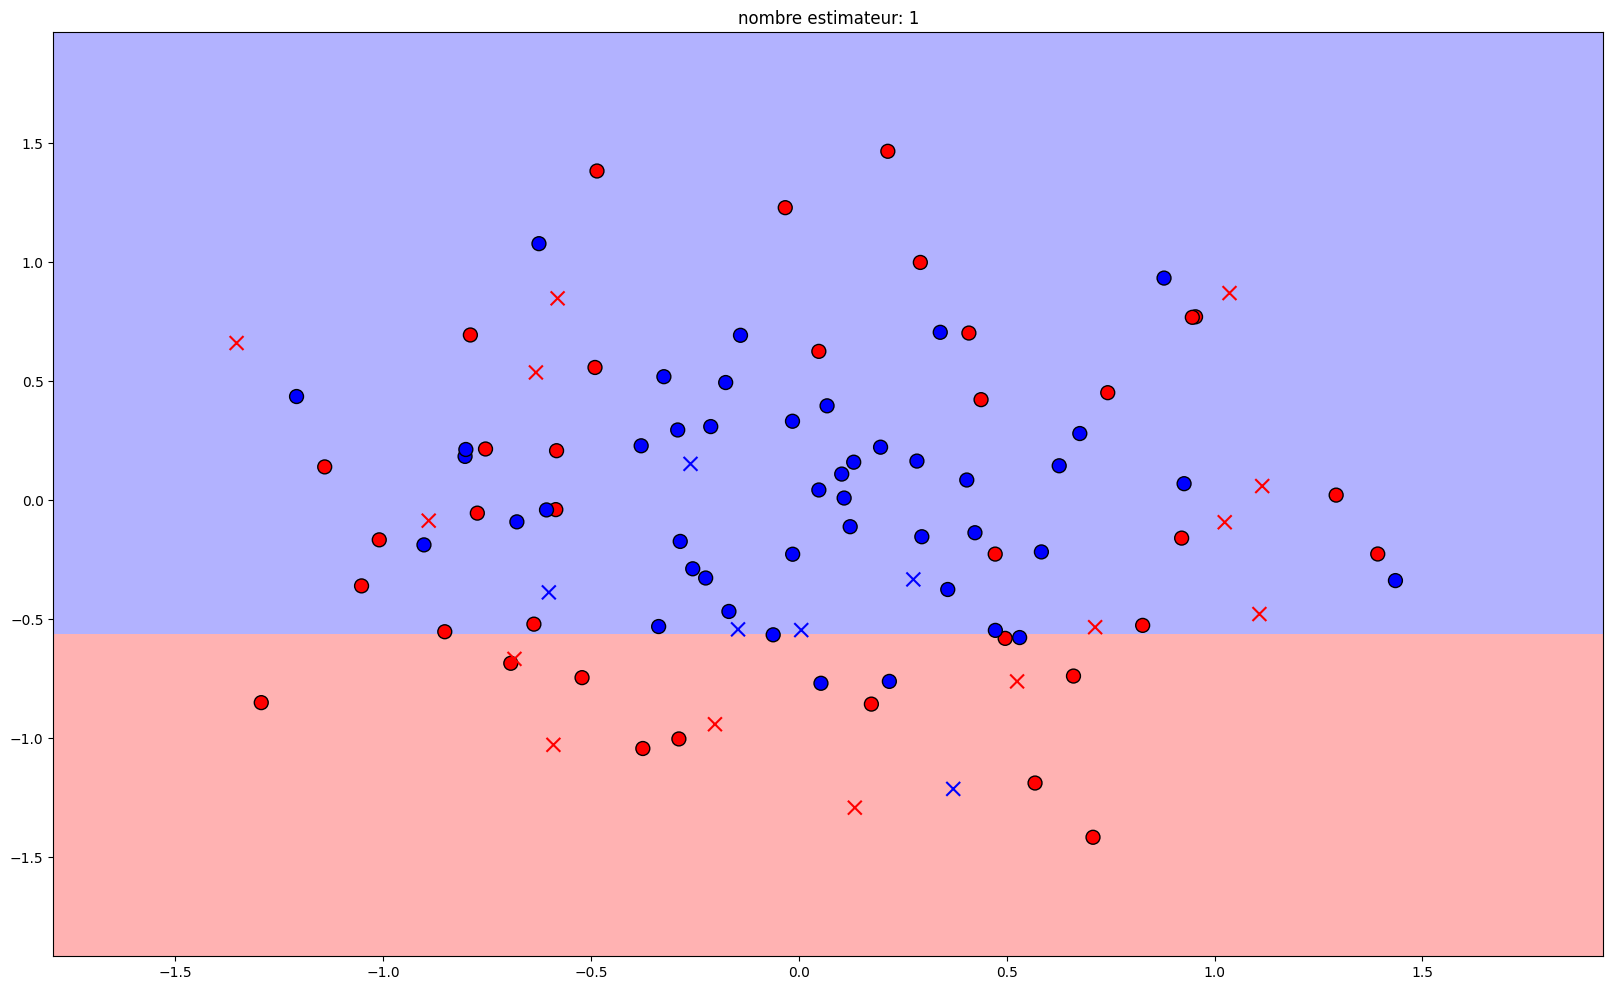

<Figure size 2000x1000 with 0 Axes>

Performance avec 3 estimateurs :
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20



/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


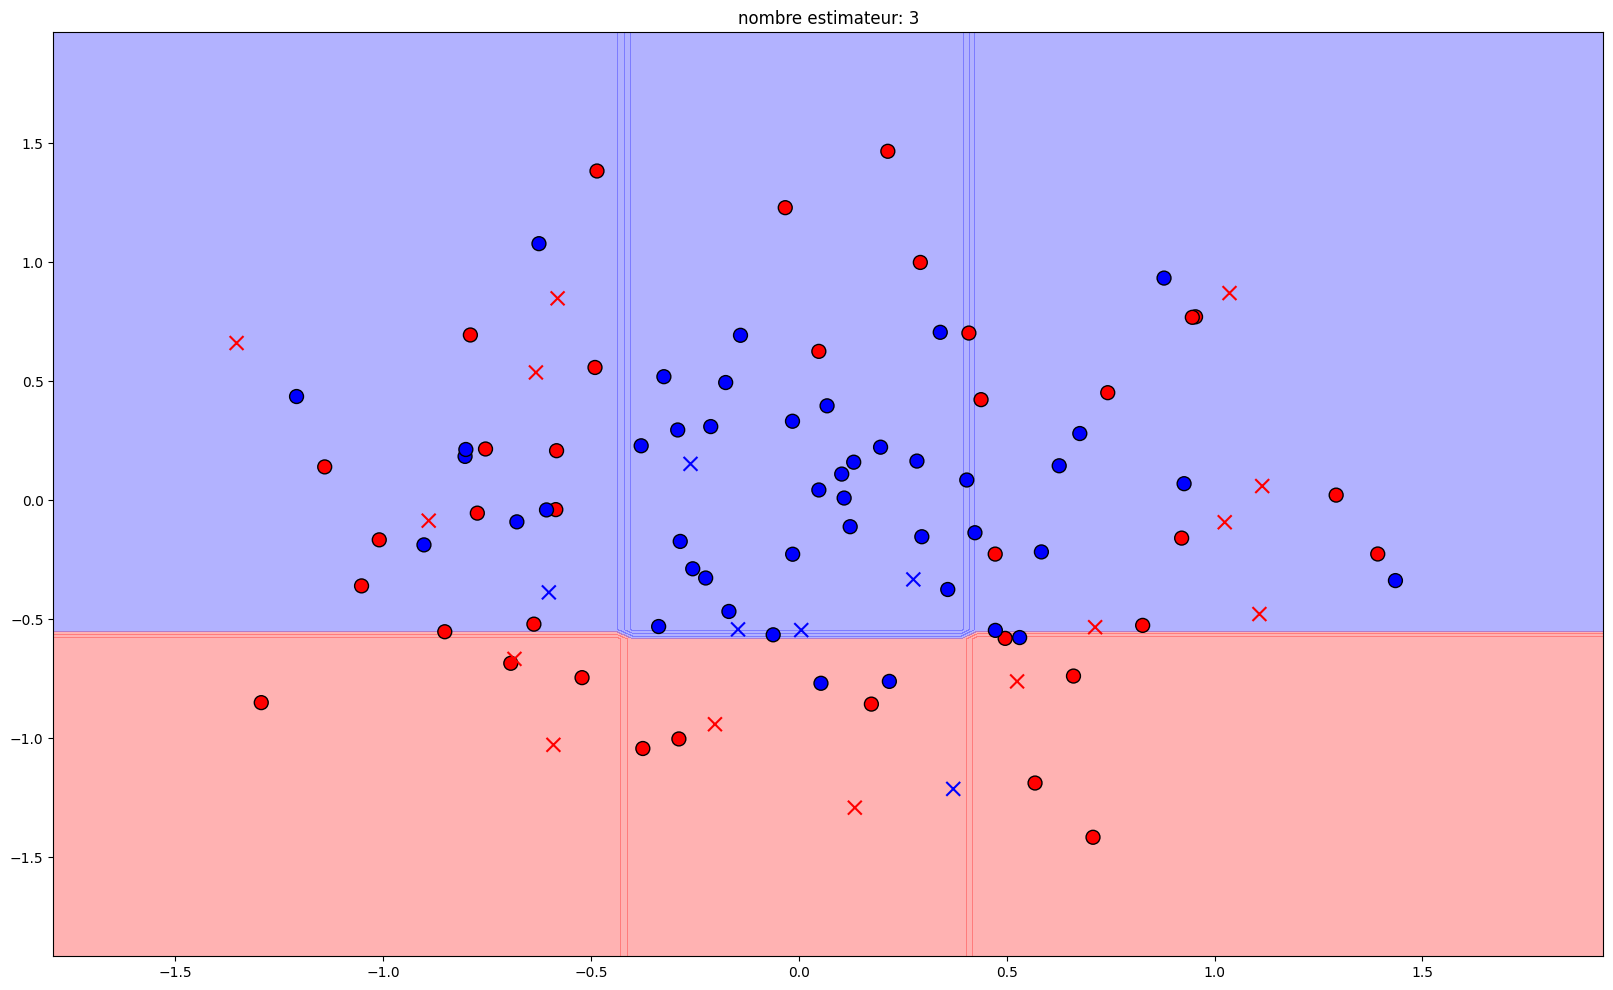

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Performance avec 5 estimateurs :
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.45      0.83      0.59         6

    accuracy                           0.65        20
   macro avg       0.67      0.70      0.64        20
weighted avg       0.76      0.65      0.66        20



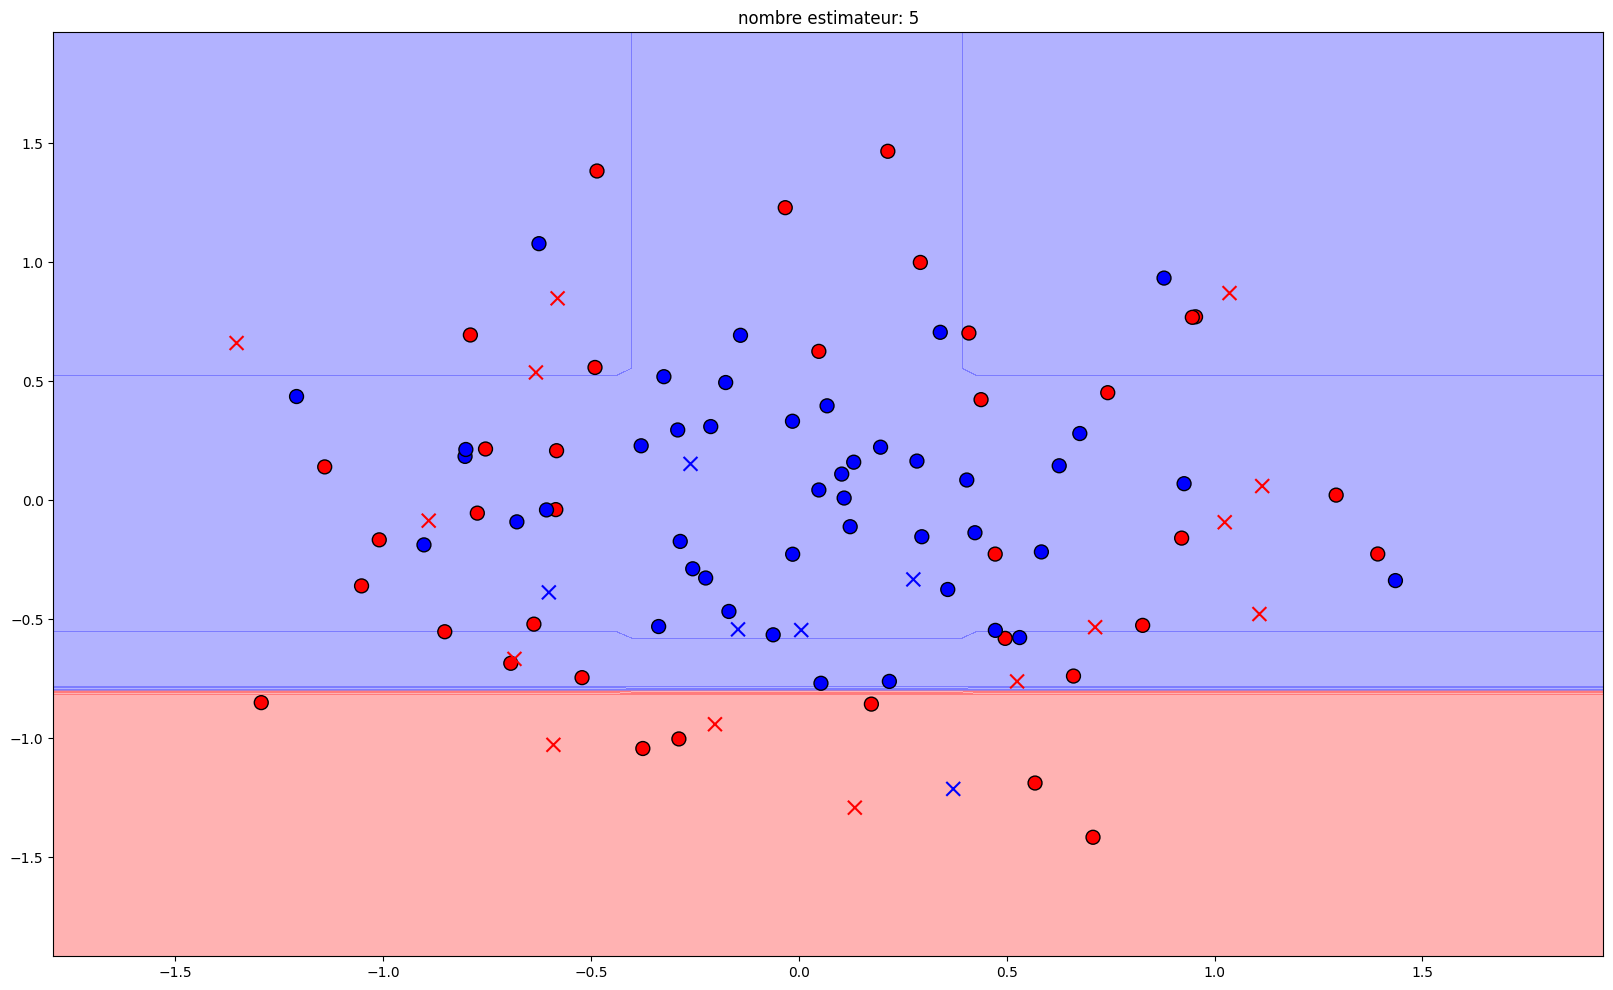

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Performance avec 7 estimateurs :
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20



/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


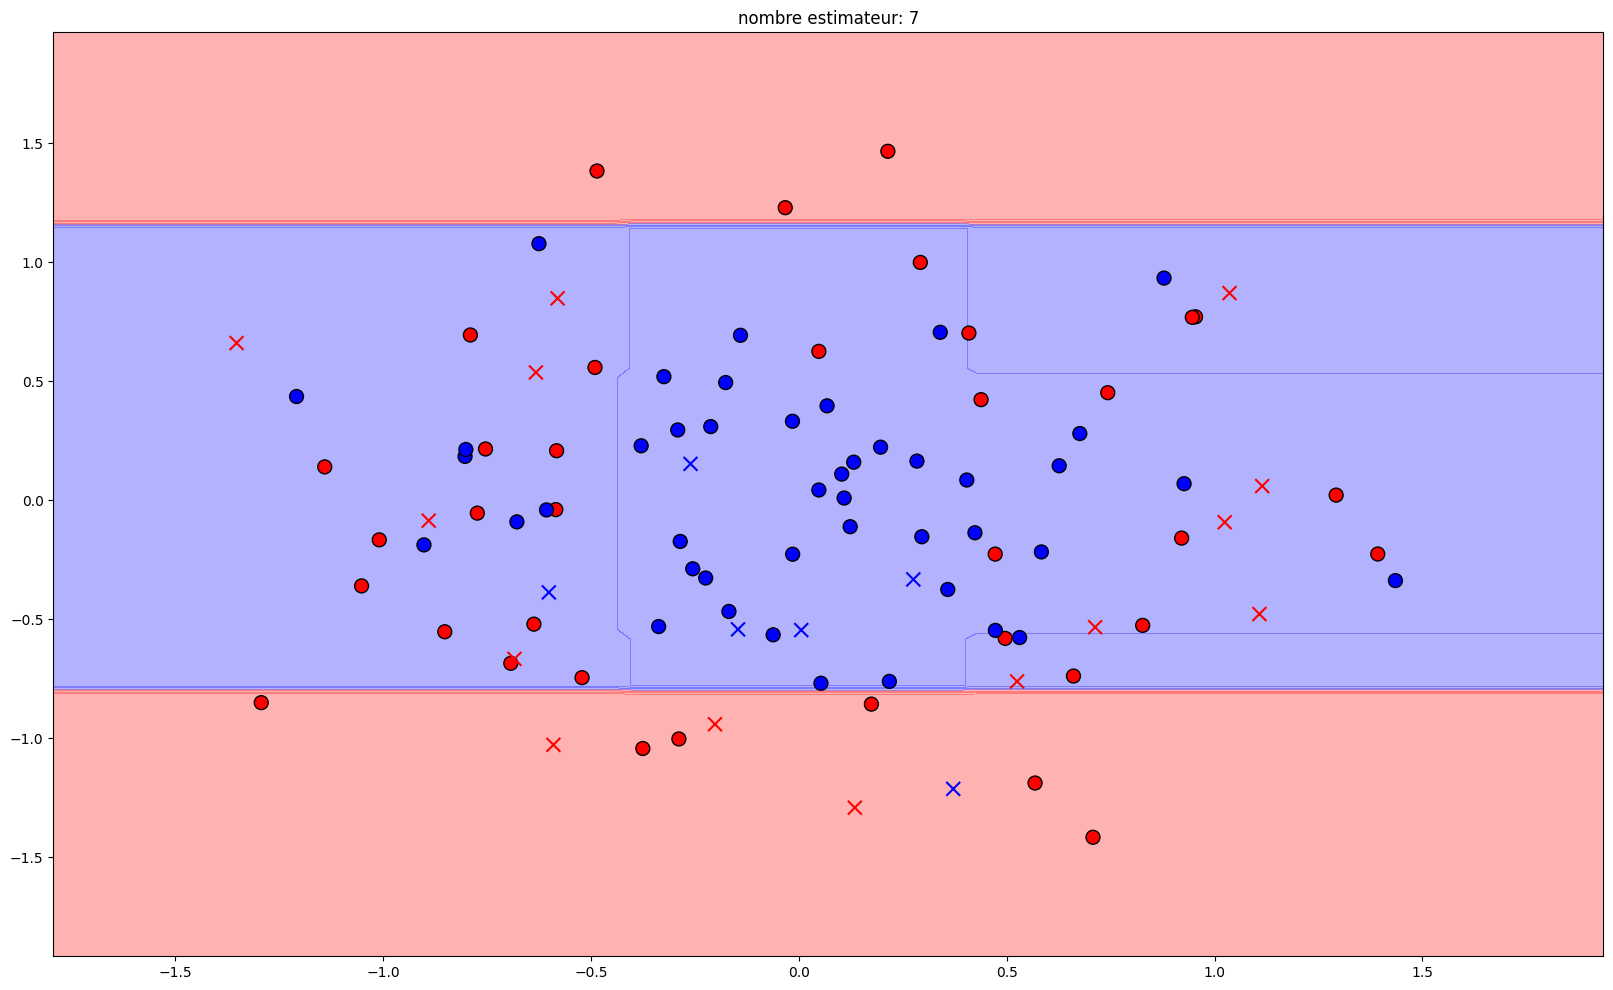

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Performance avec 9 estimateurs :
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.71      0.83      0.77         6

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



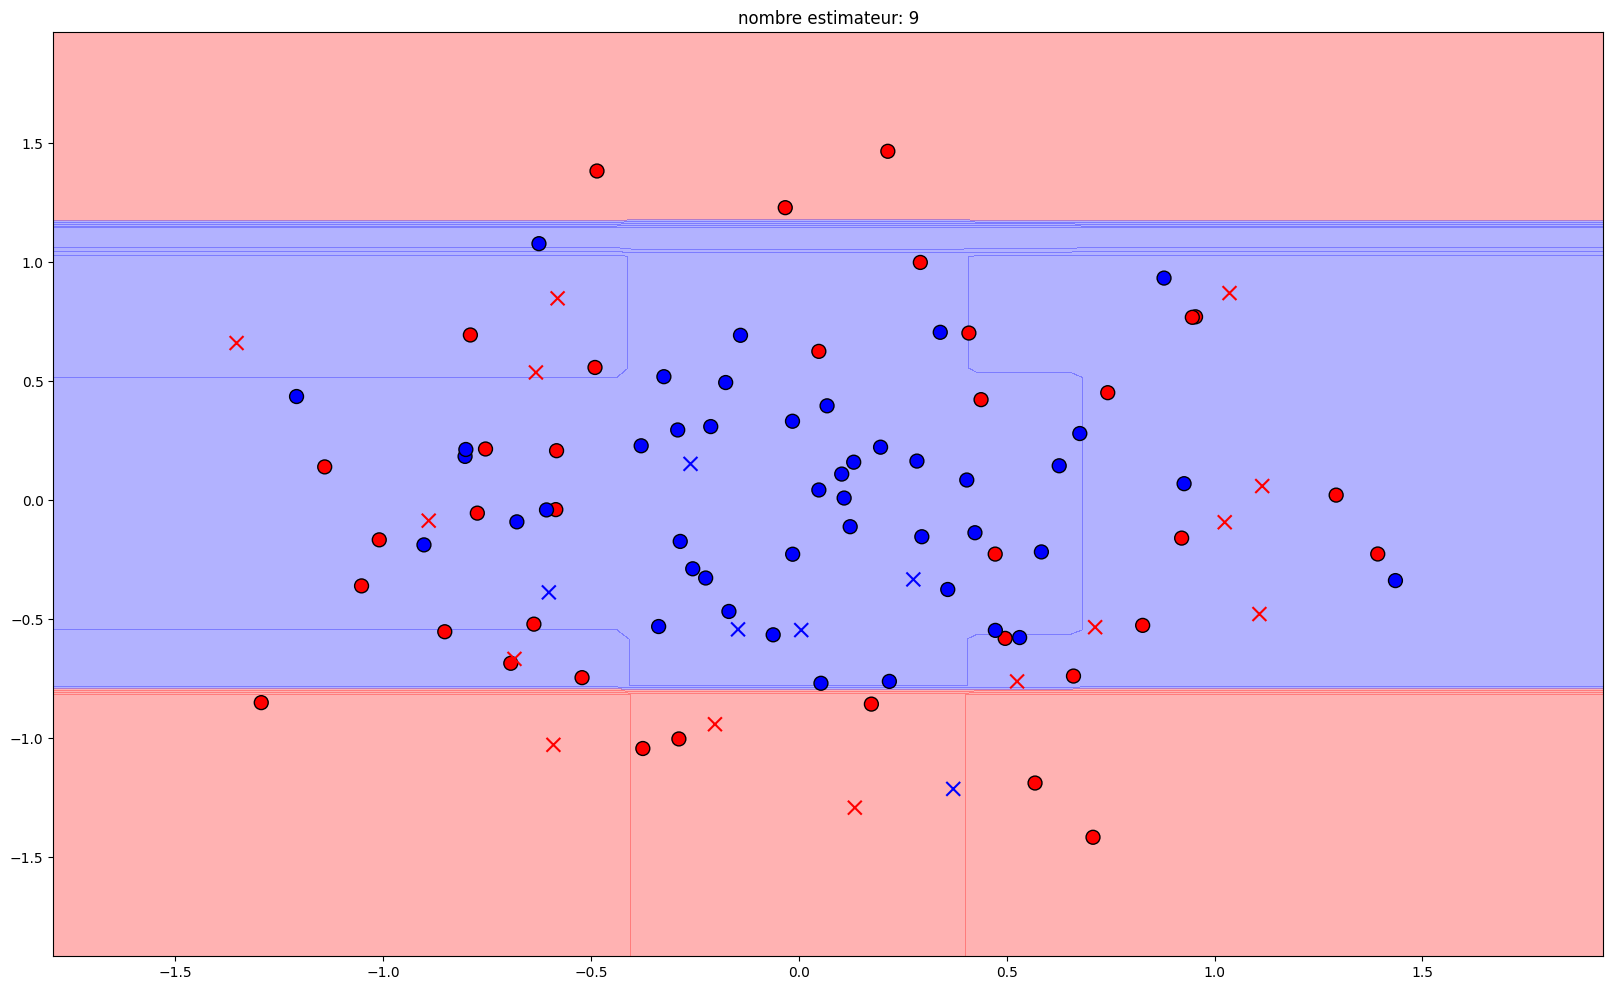

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Performance avec 11 estimateurs :
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20



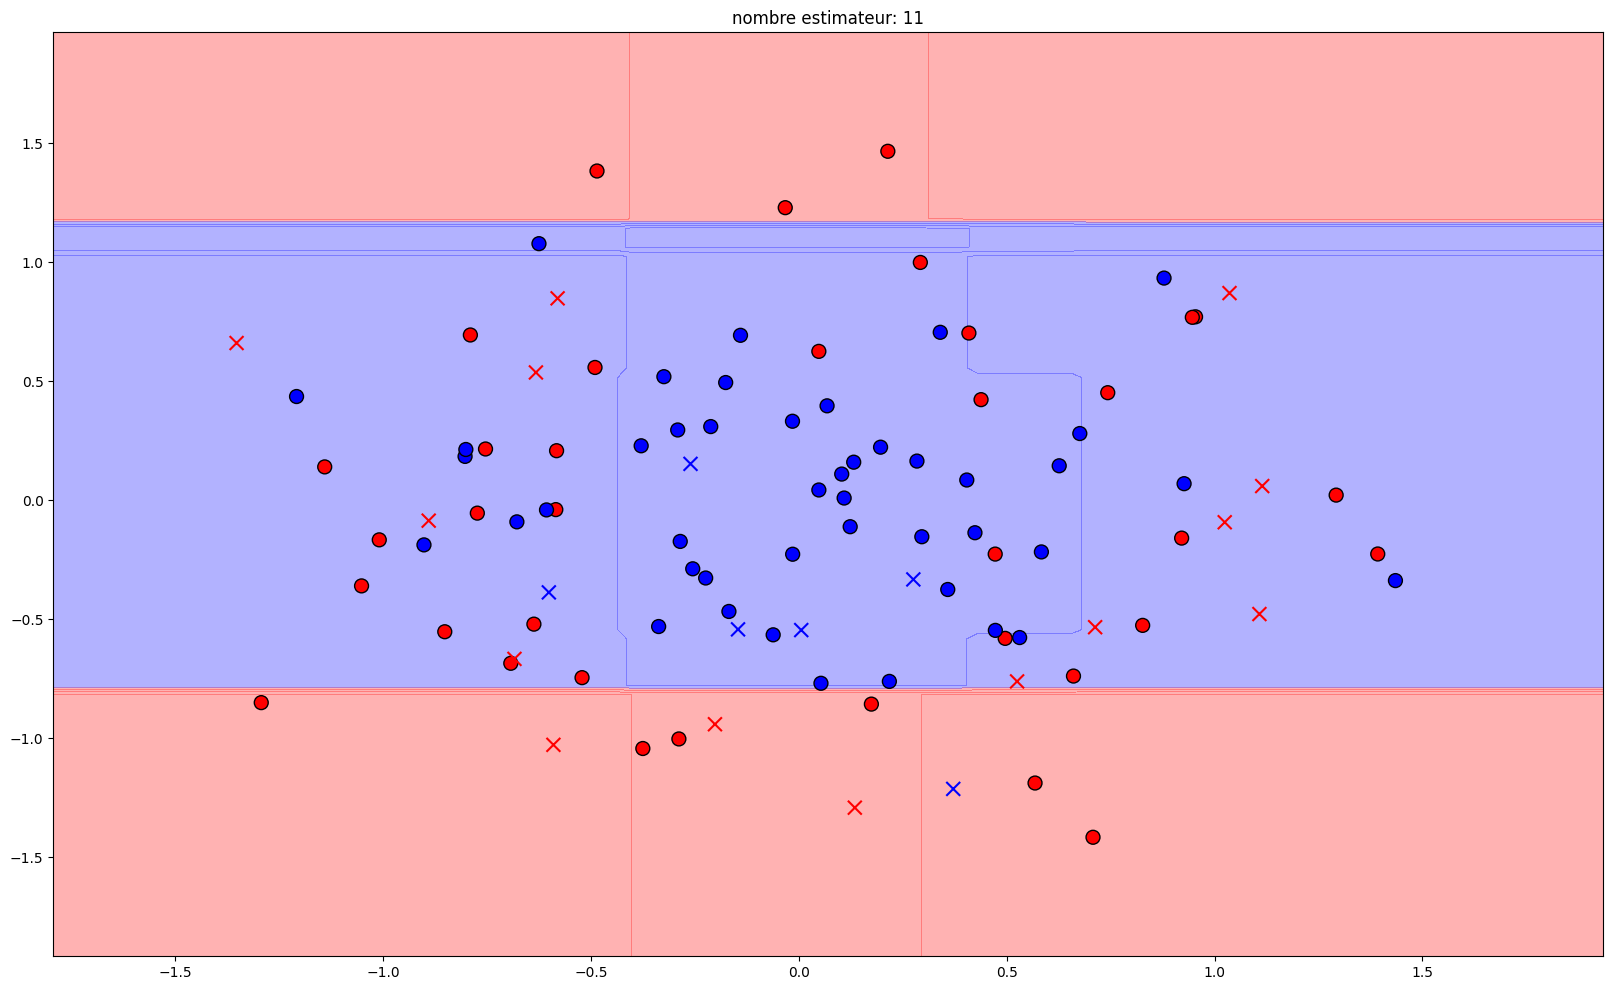

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Performance avec 13 estimateurs :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.67      0.73         6

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



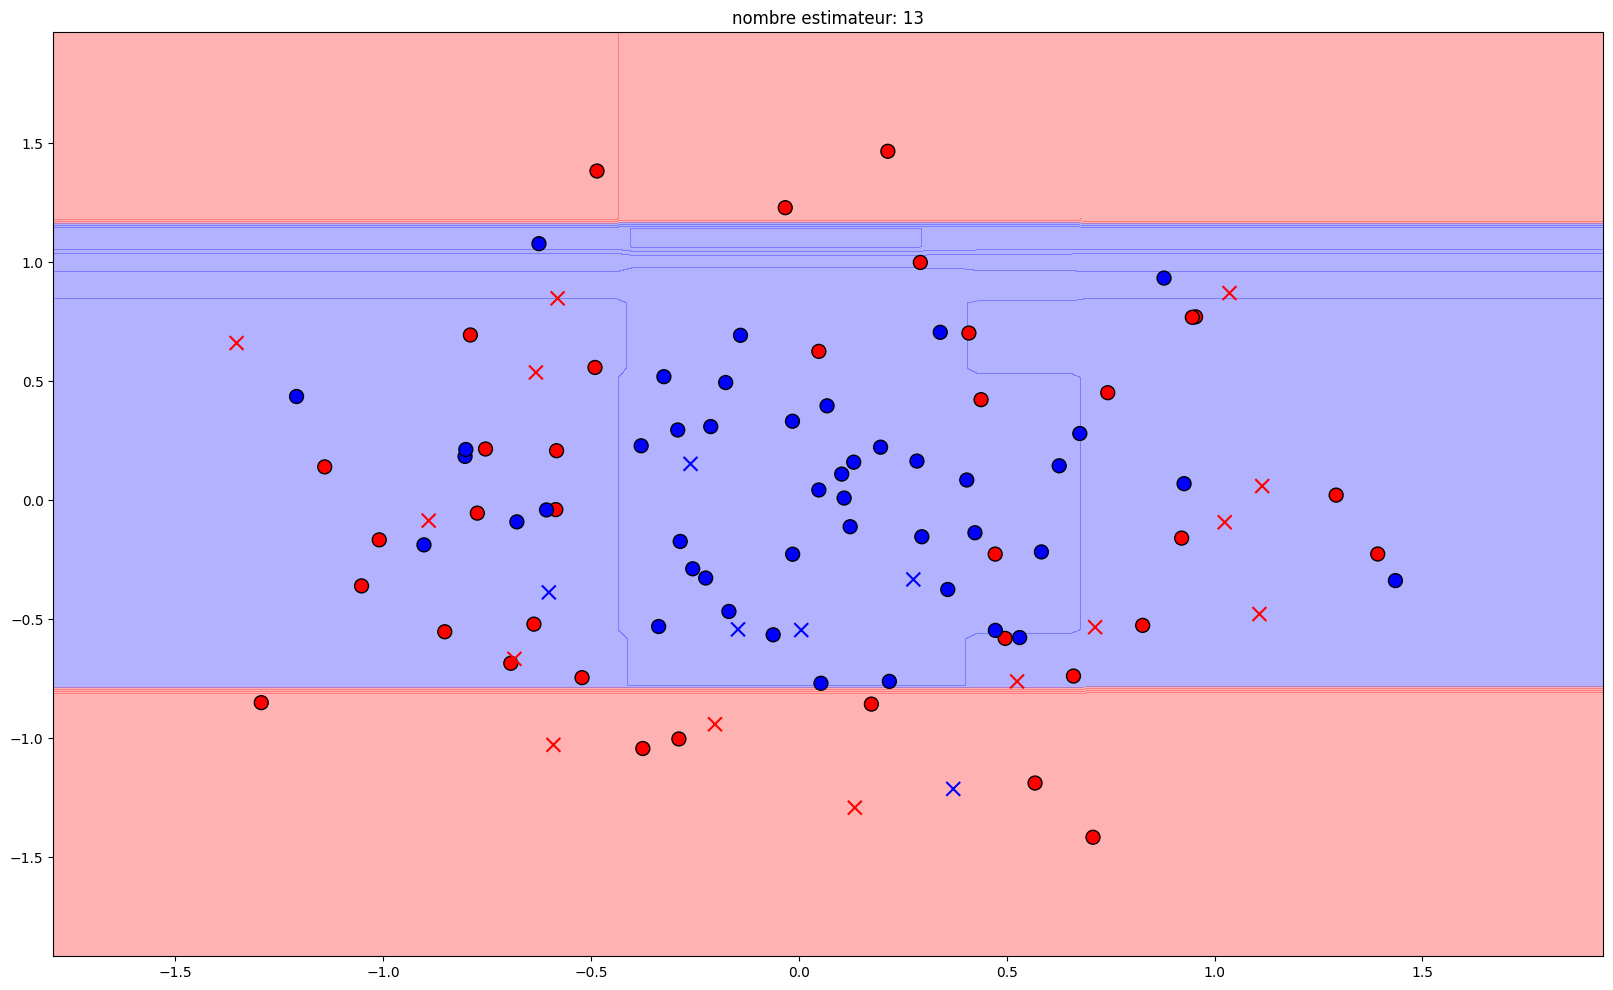

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Performance avec 15 estimateurs :
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.67      0.67      0.67         6

    accuracy                           0.80        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.80      0.80      0.80        20



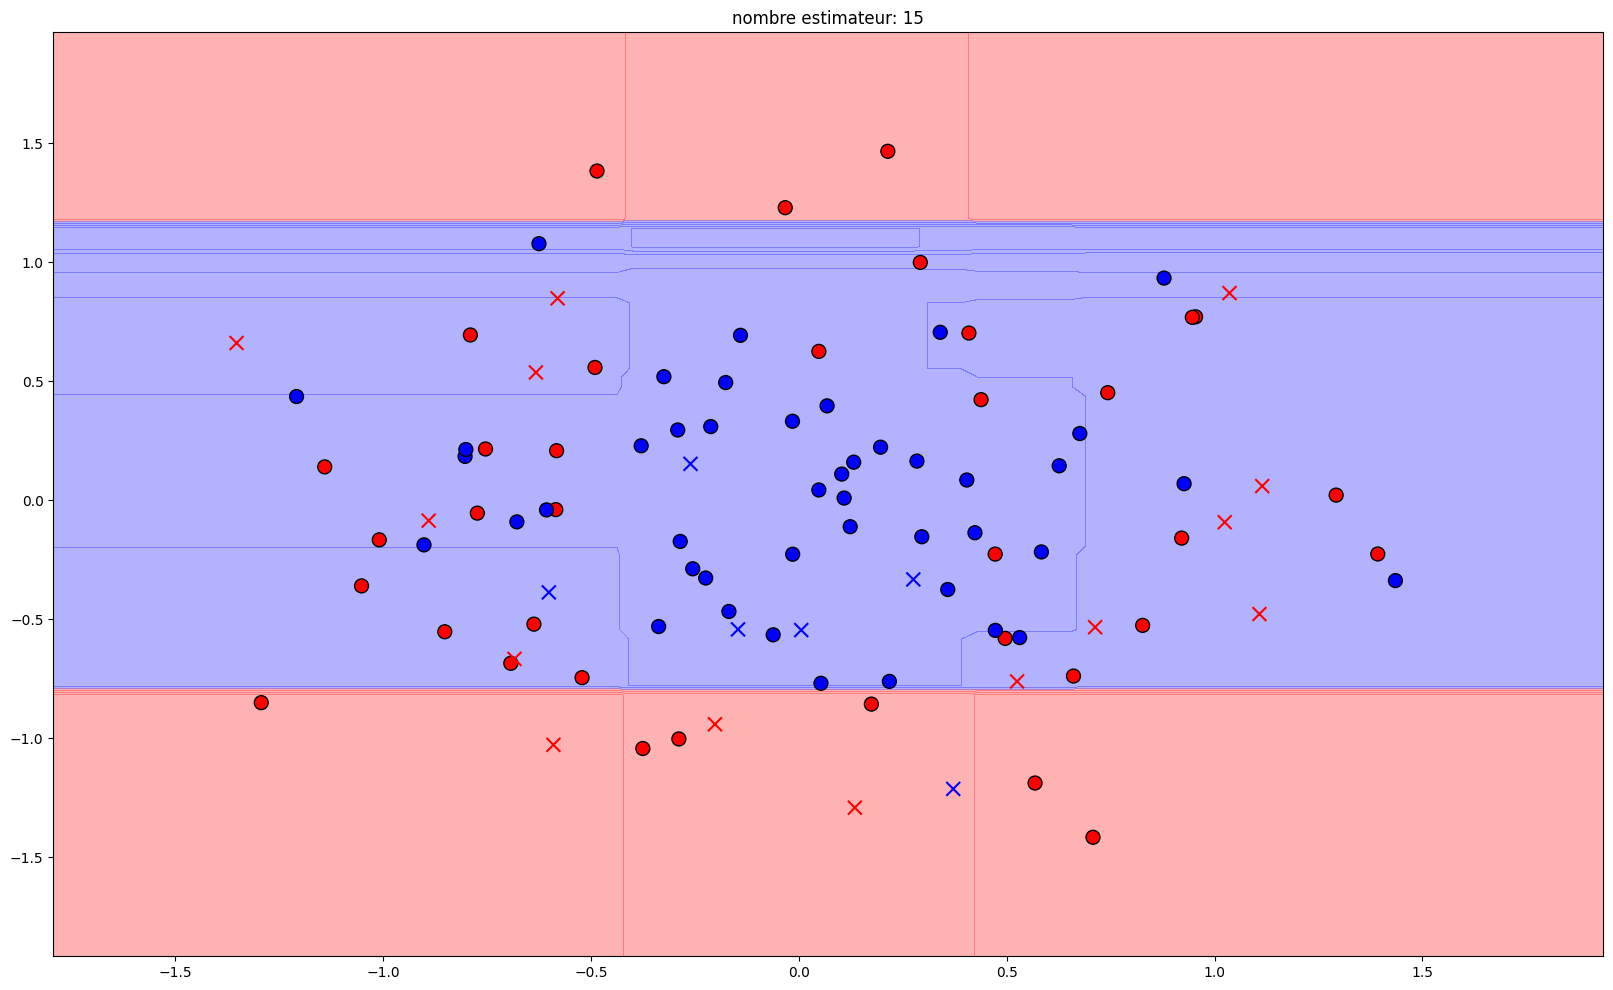

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Performance avec 17 estimateurs :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.67      0.73         6

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



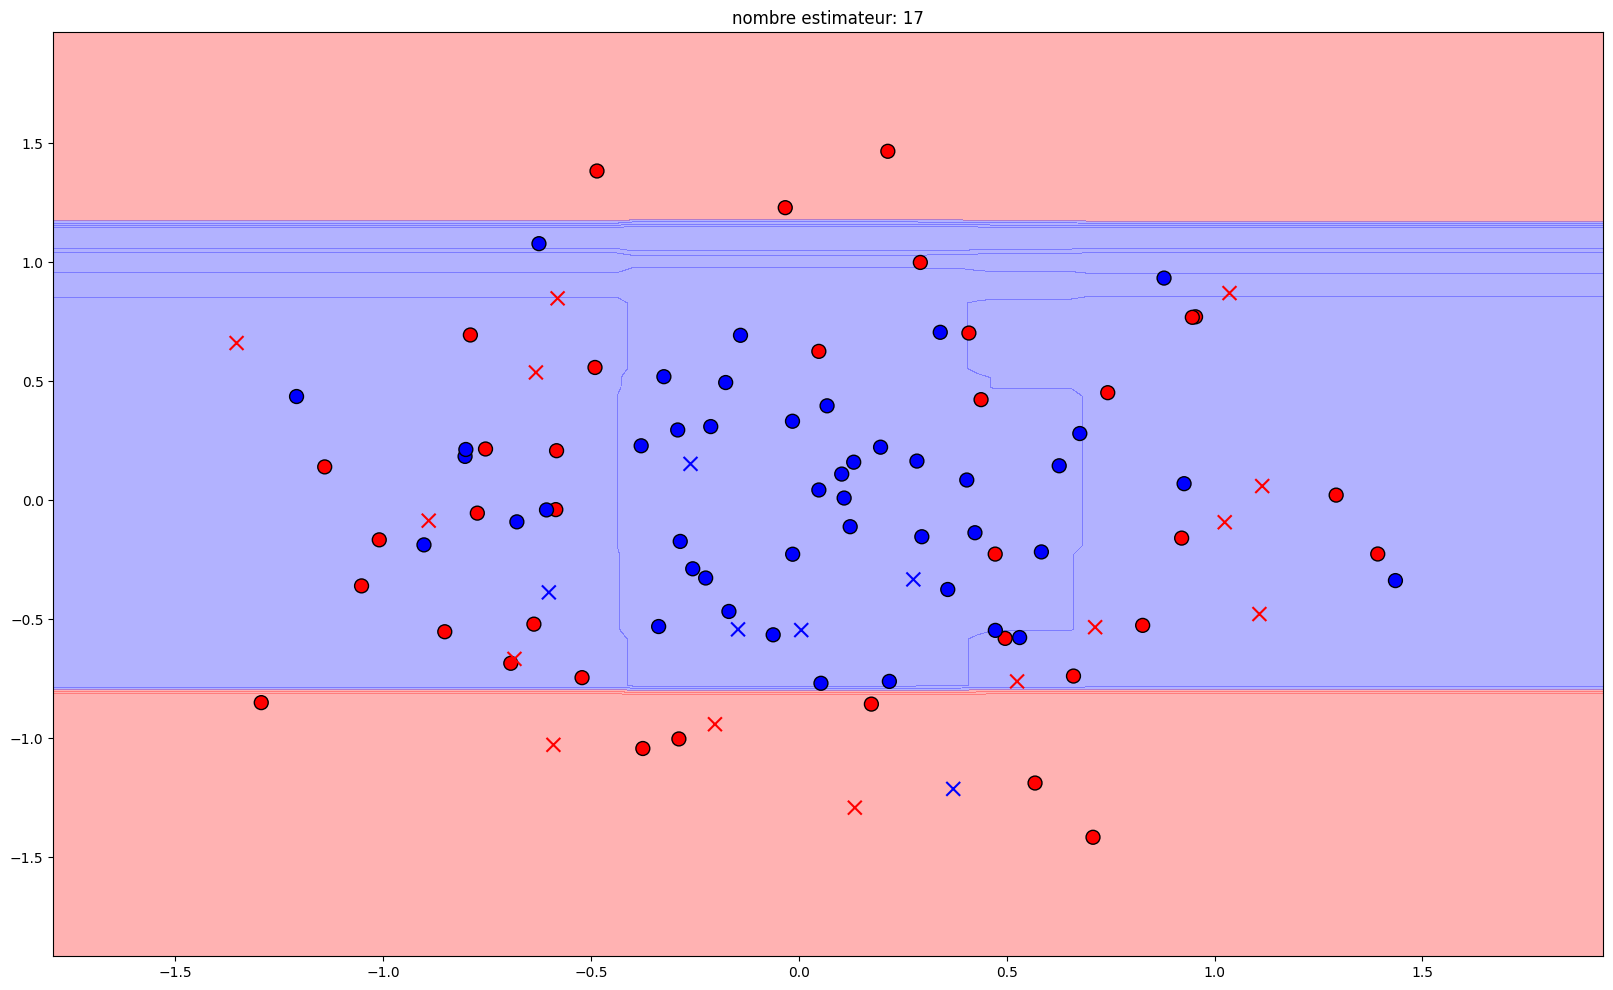

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Performance avec 19 estimateurs :
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20



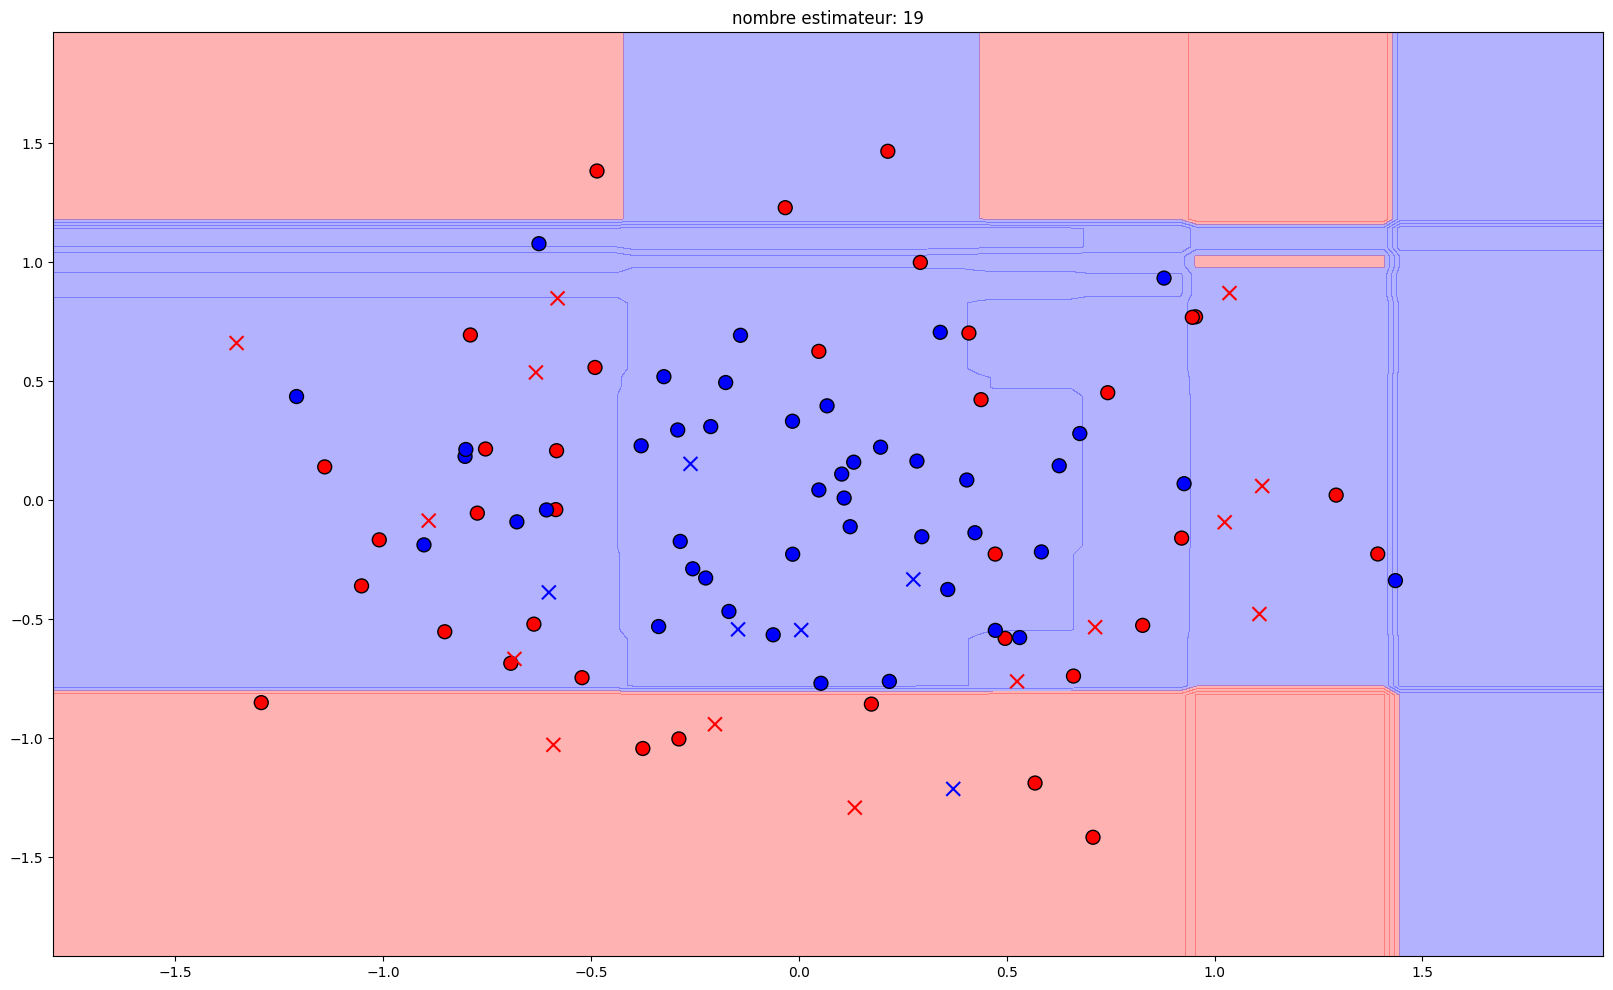

<Figure size 2000x1000 with 0 Axes>

In [13]:
# Chargement des données
X, y = make_circles(n_samples=100, factor=.5, noise=.3, random_state=42)

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Application de la PCA avec 2 composantes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Définition de l'estimateur de base
base_estimator = DecisionTreeClassifier(max_depth=1)

# Liste des nombres d'estimateurs à tester
n_estimators_list = list(range(1, 21, 2))

# Boucle sur les différents nombres d'estimateurs
for n_estimators in n_estimators_list:
    # Création de l'objet AdaBoostClassifier
    clf_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

    # Apprentissage du modèle sur les données d'entraînement
    clf_boost.fit(X_train_pca, y_train)

    # Affichage de la performance sur les données de test
    print(f"Performance avec {n_estimators} estimateurs :")
    print(classification_report(y_test, clf_boost.predict(X_test_pca)))

    # Visualisation de la frontière de décision
    plot_boundary(clf_boost, X_train_pca, X_test_pca, y_train, y_test, n_estimators)
    plt.show()


Même question que précédemment mais utilisez un `Perceptron` avec les paramètres par défaut comme estimateur de base.

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Nombre d'estimateurs : 1
              precision    recall  f1-score   support

           0       0.83      0.36      0.50        14
           1       0.36      0.83      0.50         6

    accuracy                           0.50        20
   macro avg       0.60      0.60      0.50        20
weighted avg       0.69      0.50      0.50        20



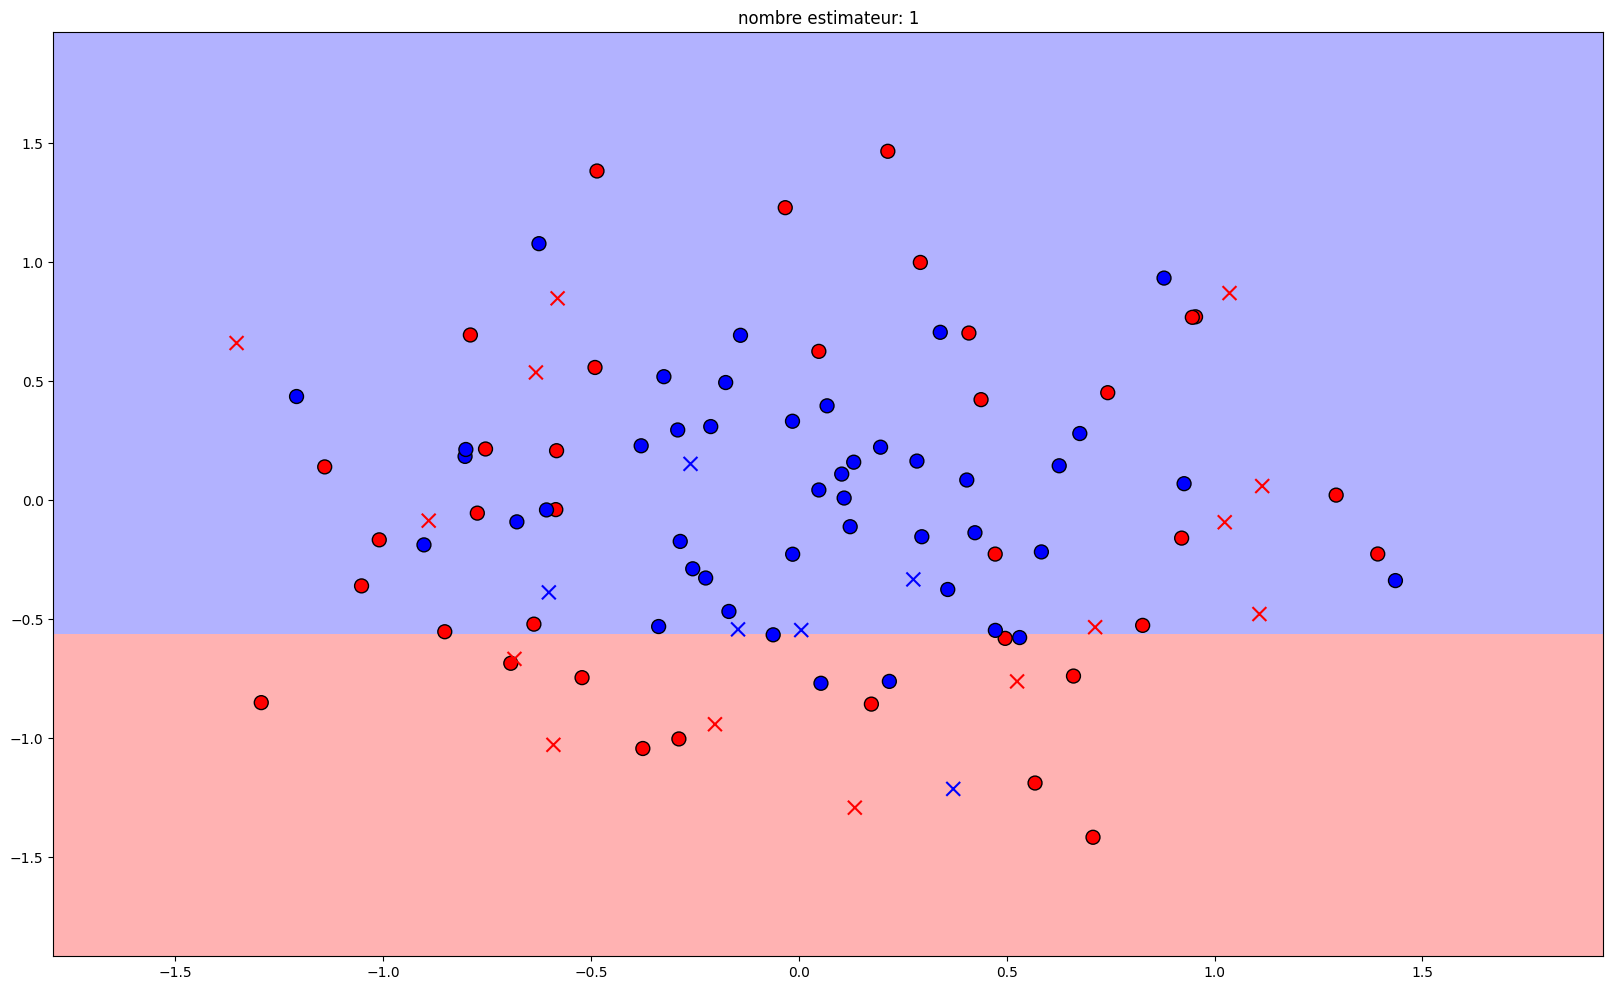

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Nombre d'estimateurs : 3
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.44      0.67      0.53         6

    accuracy                           0.65        20
   macro avg       0.63      0.65      0.63        20
weighted avg       0.71      0.65      0.66        20



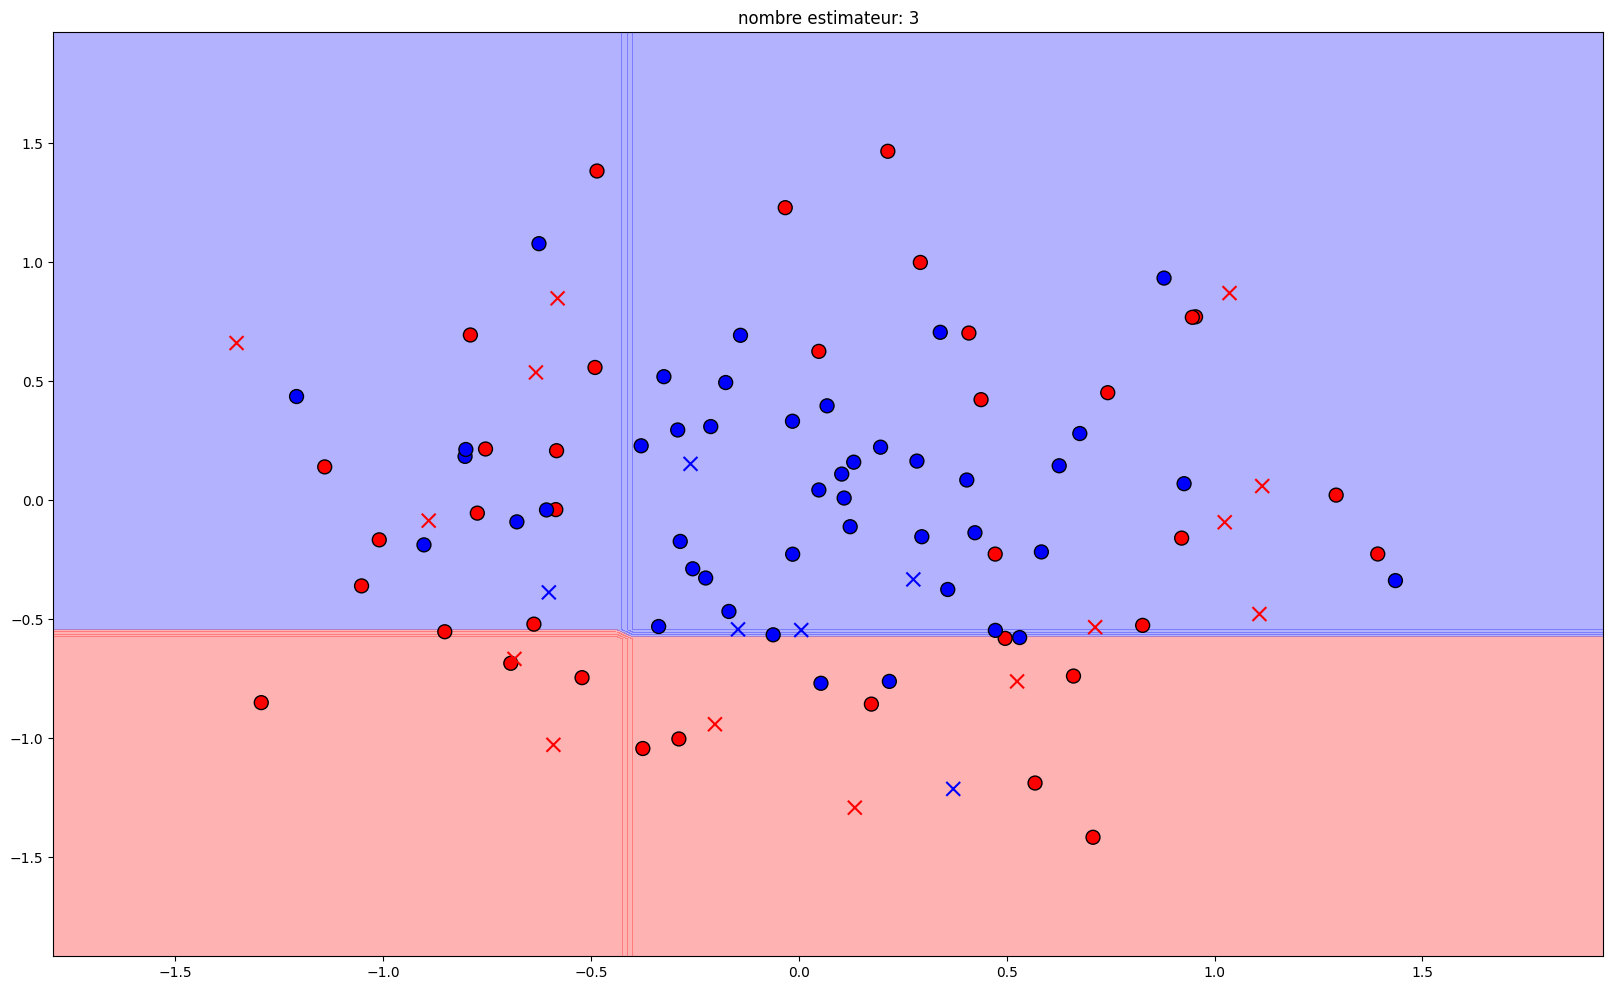

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Nombre d'estimateurs : 5
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        14
           1       0.43      1.00      0.60         6

    accuracy                           0.60        20
   macro avg       0.71      0.71      0.60        20
weighted avg       0.83      0.60      0.60        20



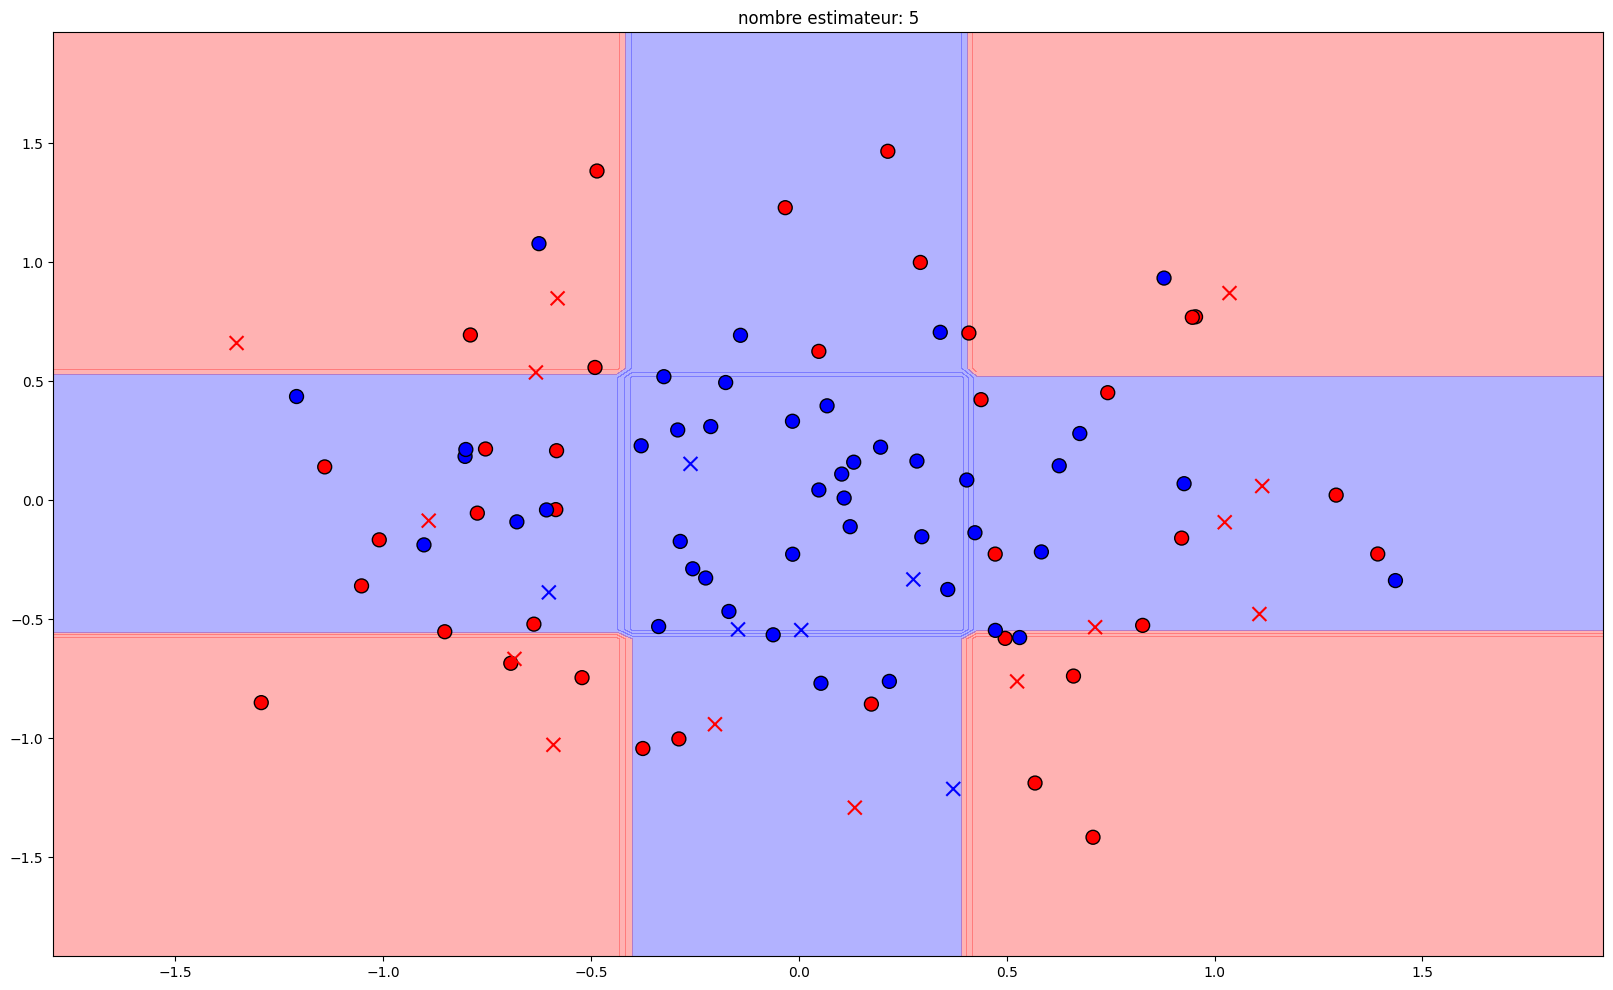

<Figure size 2000x1000 with 0 Axes>

Nombre d'estimateurs : 7
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.45      0.83      0.59         6

    accuracy                           0.65        20
   macro avg       0.67      0.70      0.64        20
weighted avg       0.76      0.65      0.66        20



/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


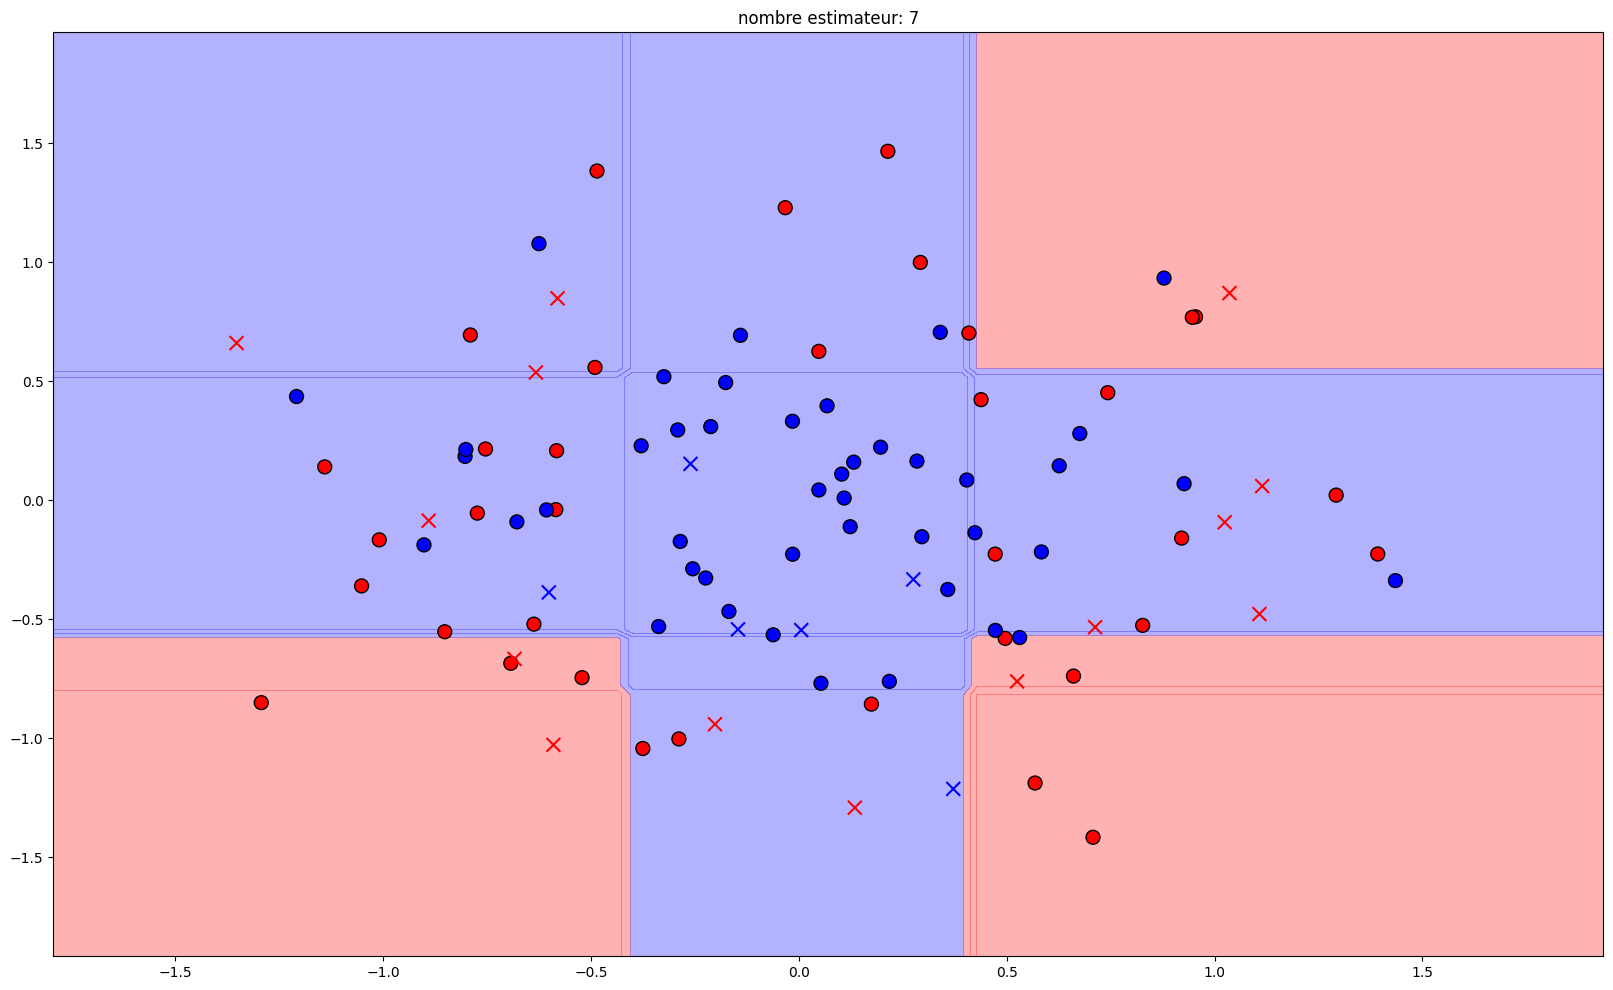

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Nombre d'estimateurs : 9
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20



/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


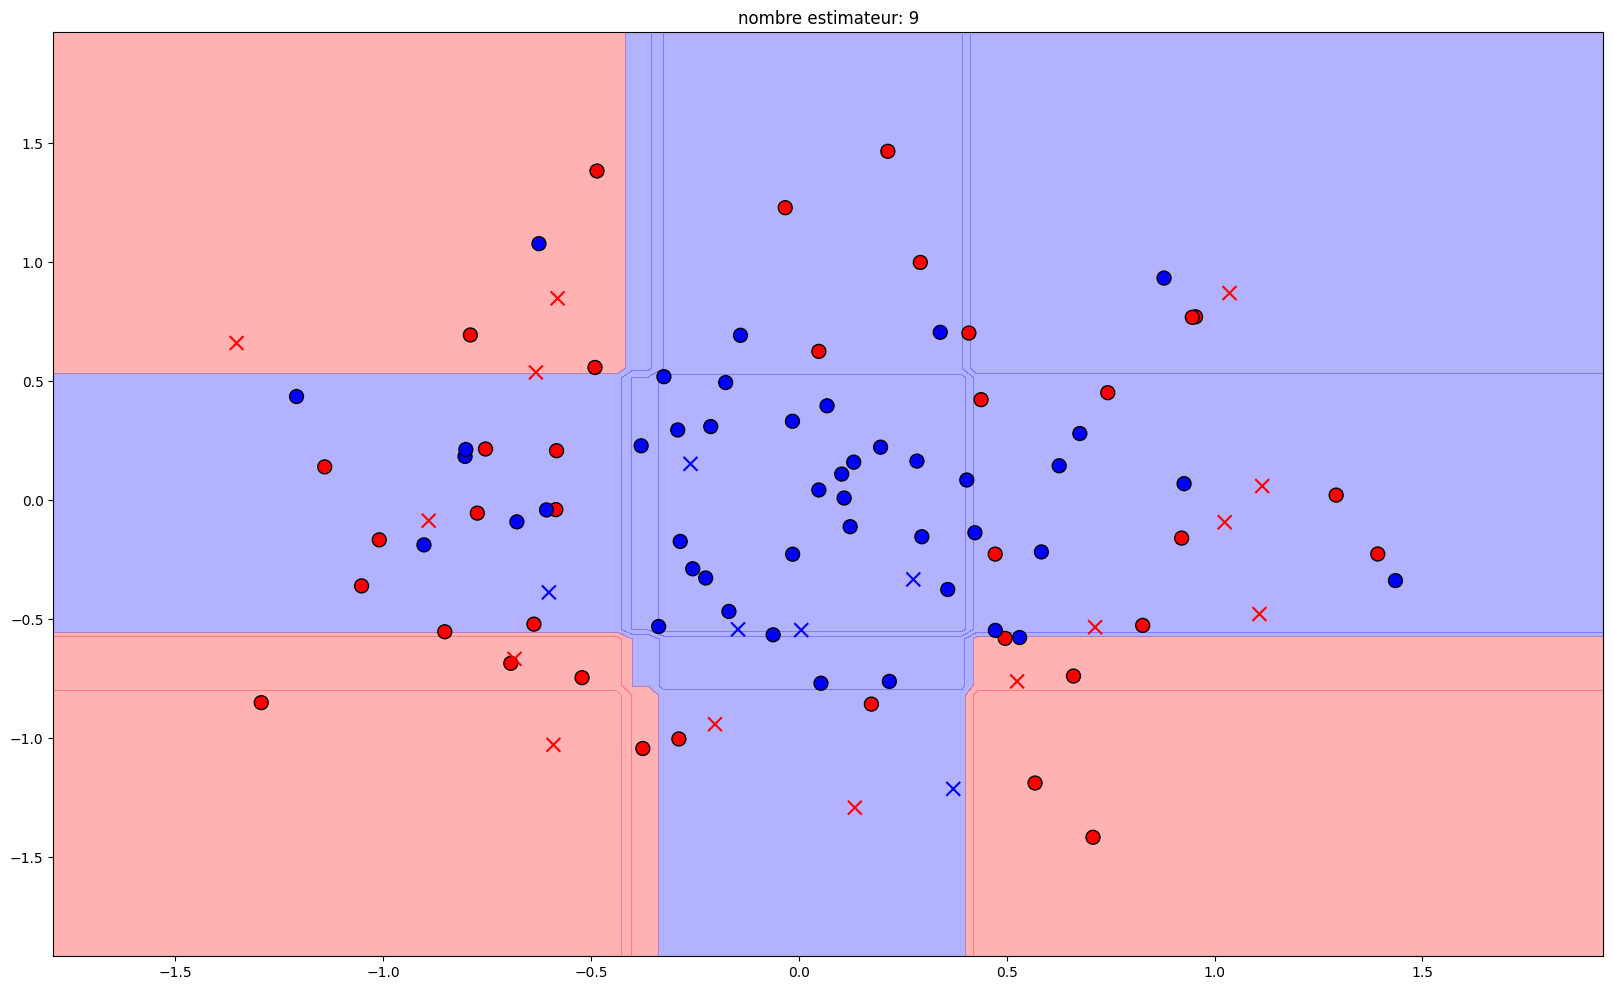

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Nombre d'estimateurs : 11
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20



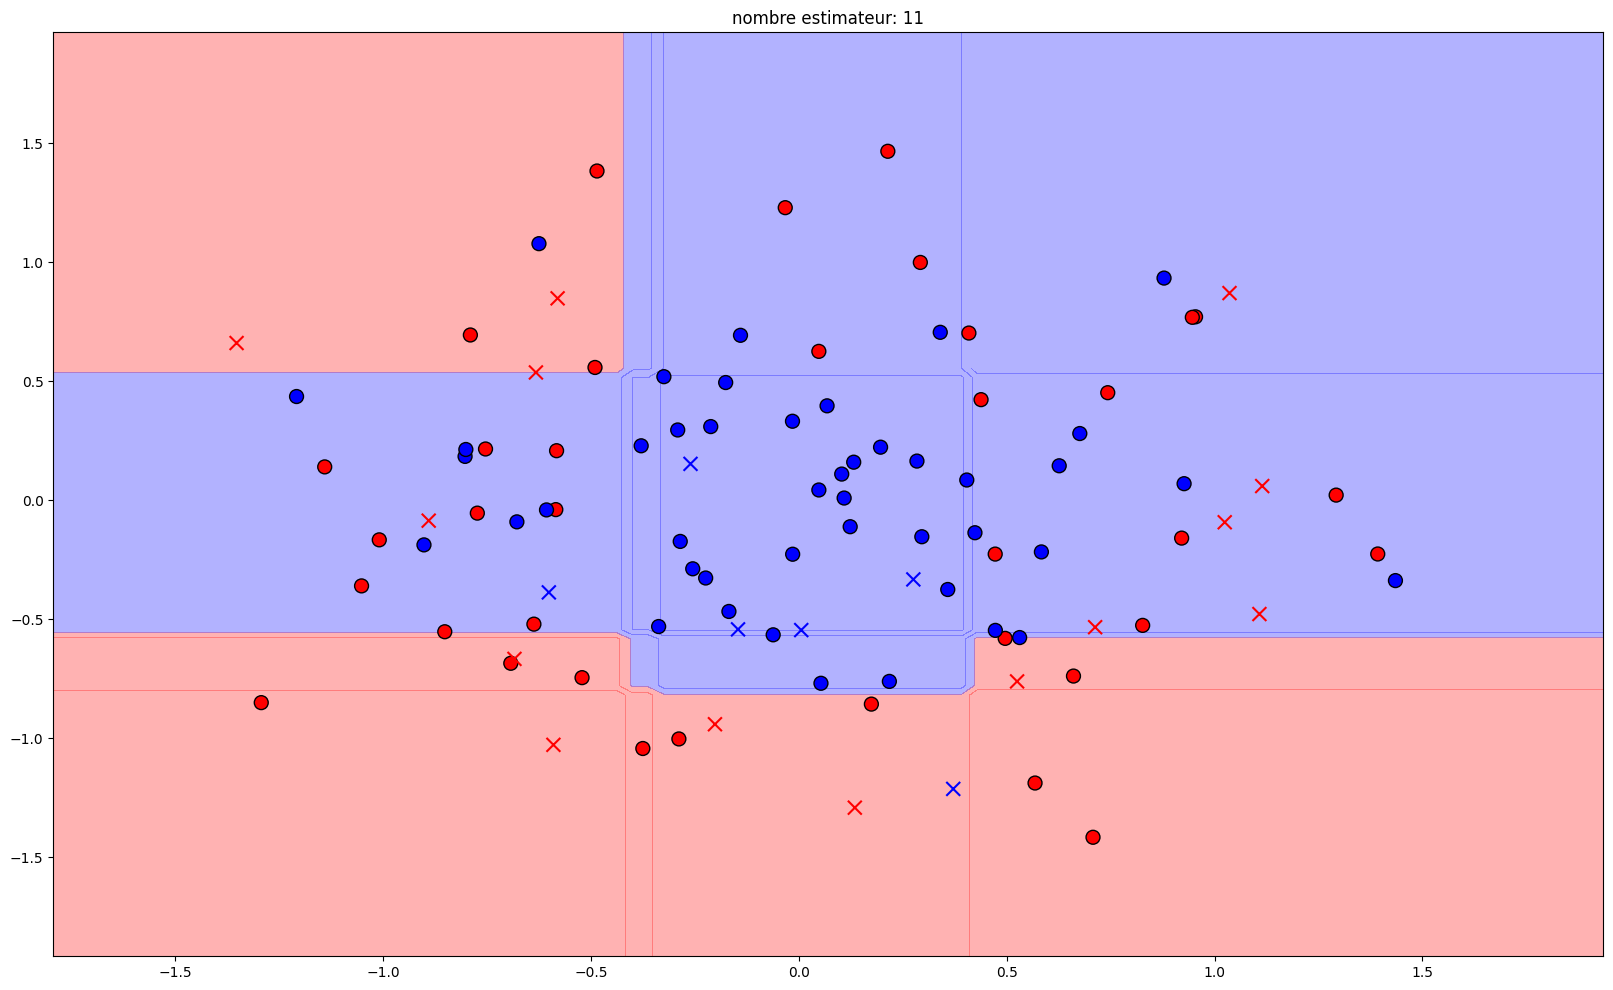

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Nombre d'estimateurs : 13
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20



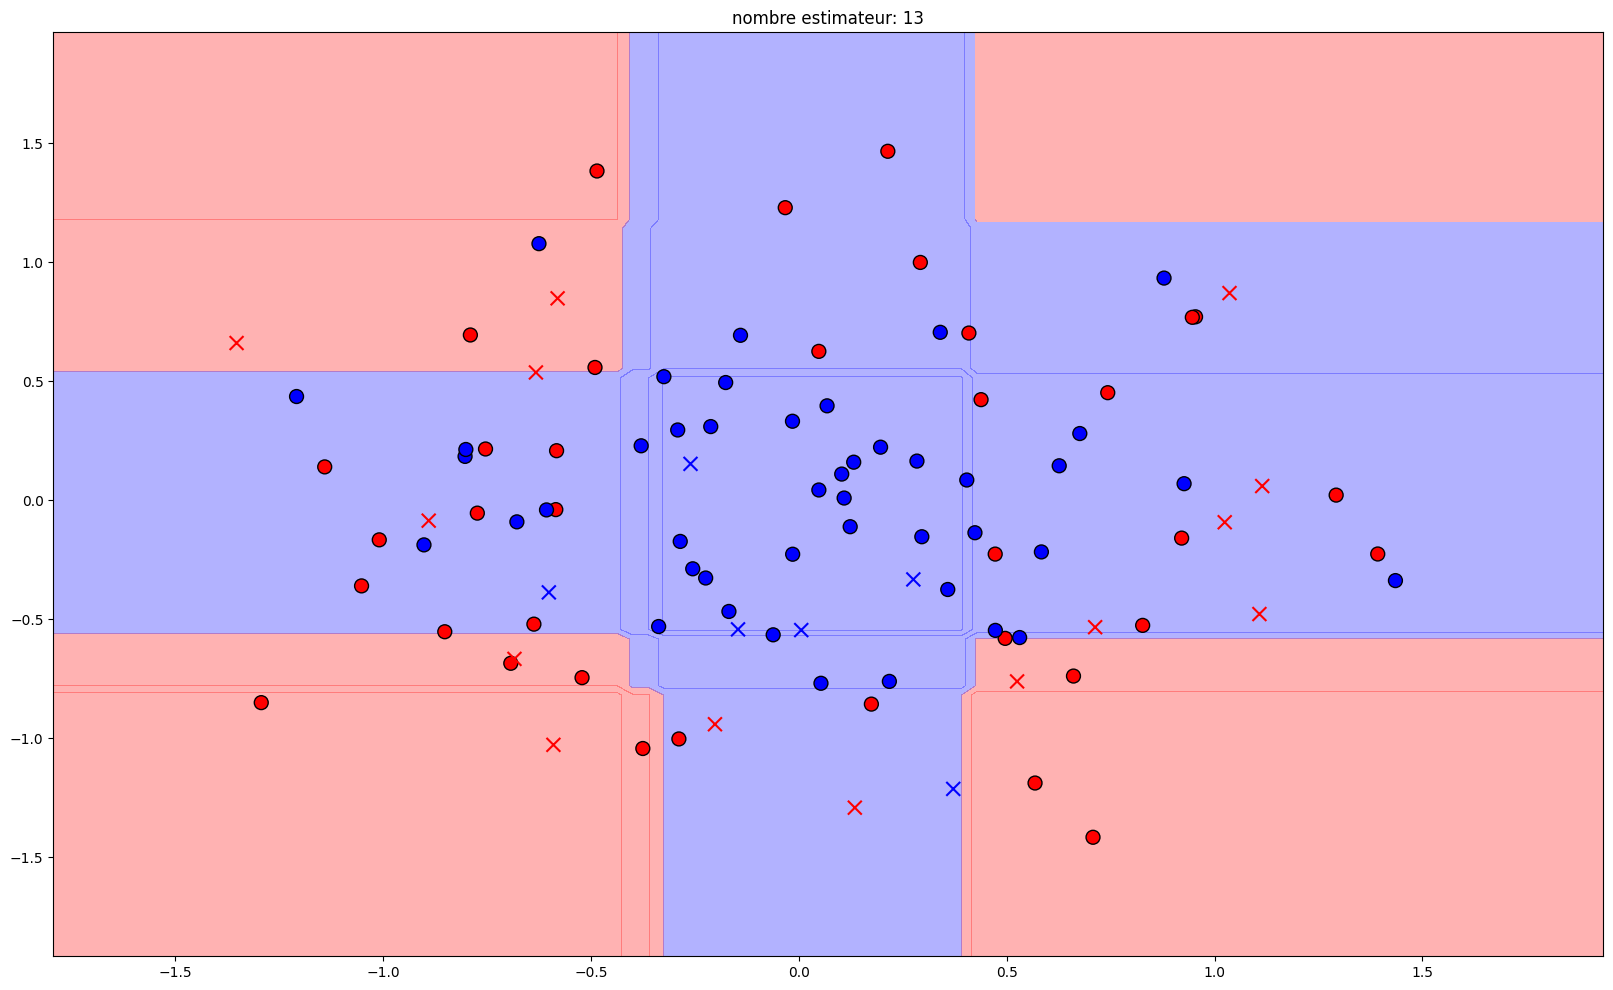

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Nombre d'estimateurs : 15
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.45      0.83      0.59         6

    accuracy                           0.65        20
   macro avg       0.67      0.70      0.64        20
weighted avg       0.76      0.65      0.66        20



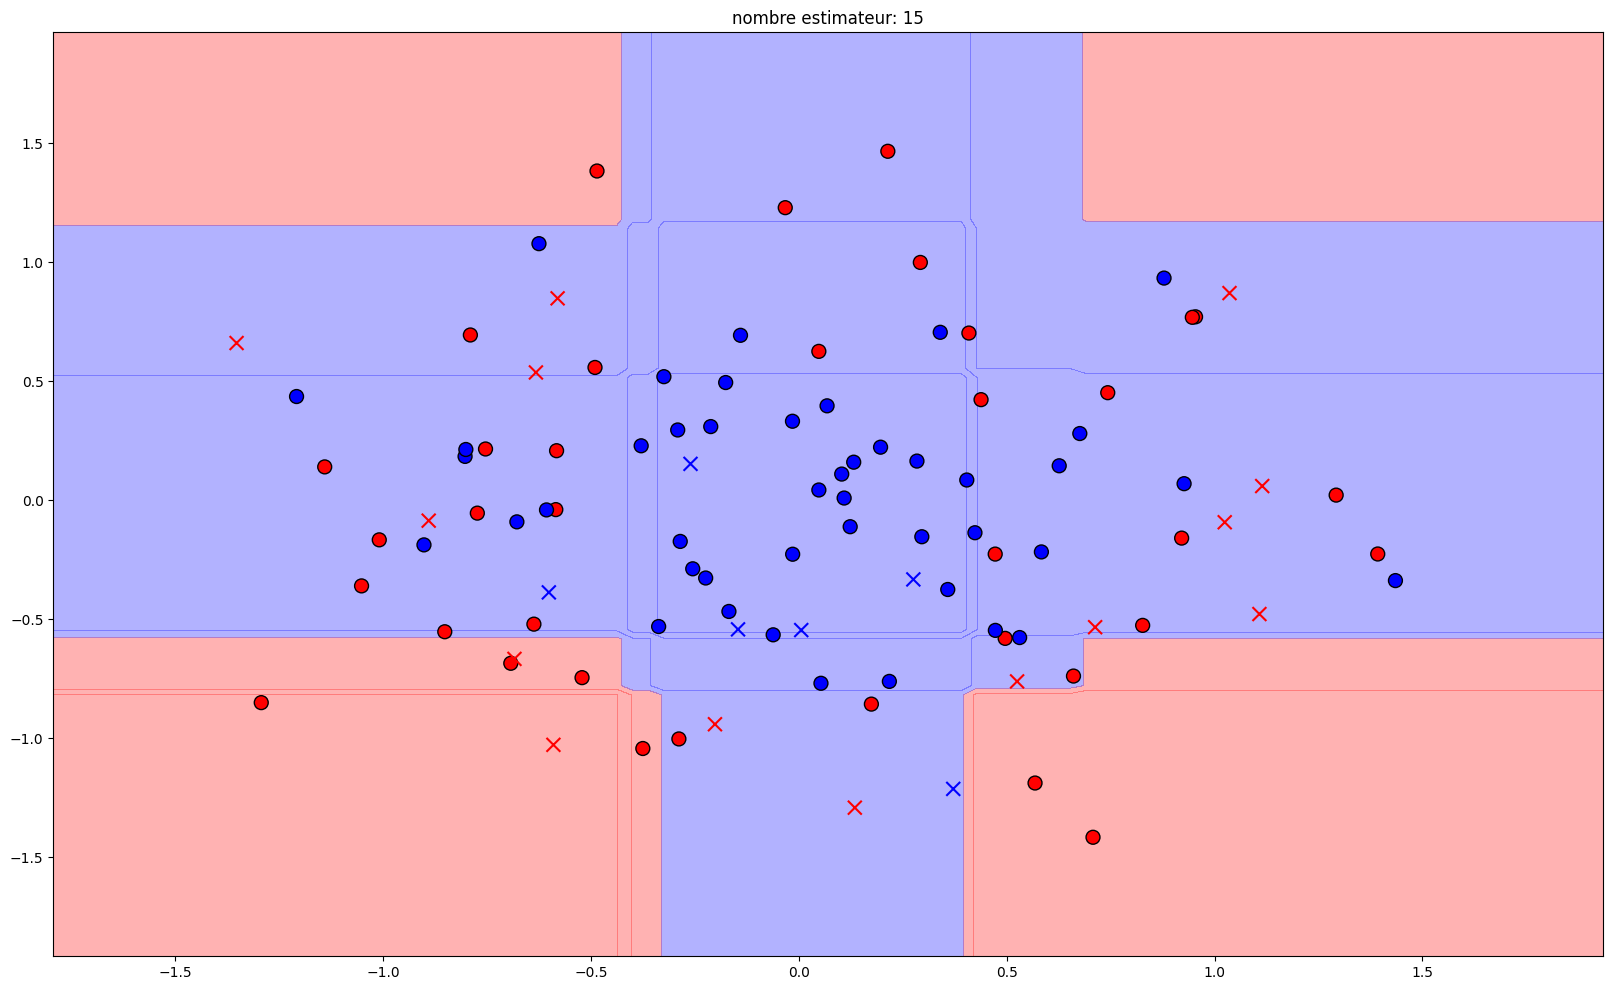

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Nombre d'estimateurs : 17
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.45      0.83      0.59         6

    accuracy                           0.65        20
   macro avg       0.67      0.70      0.64        20
weighted avg       0.76      0.65      0.66        20



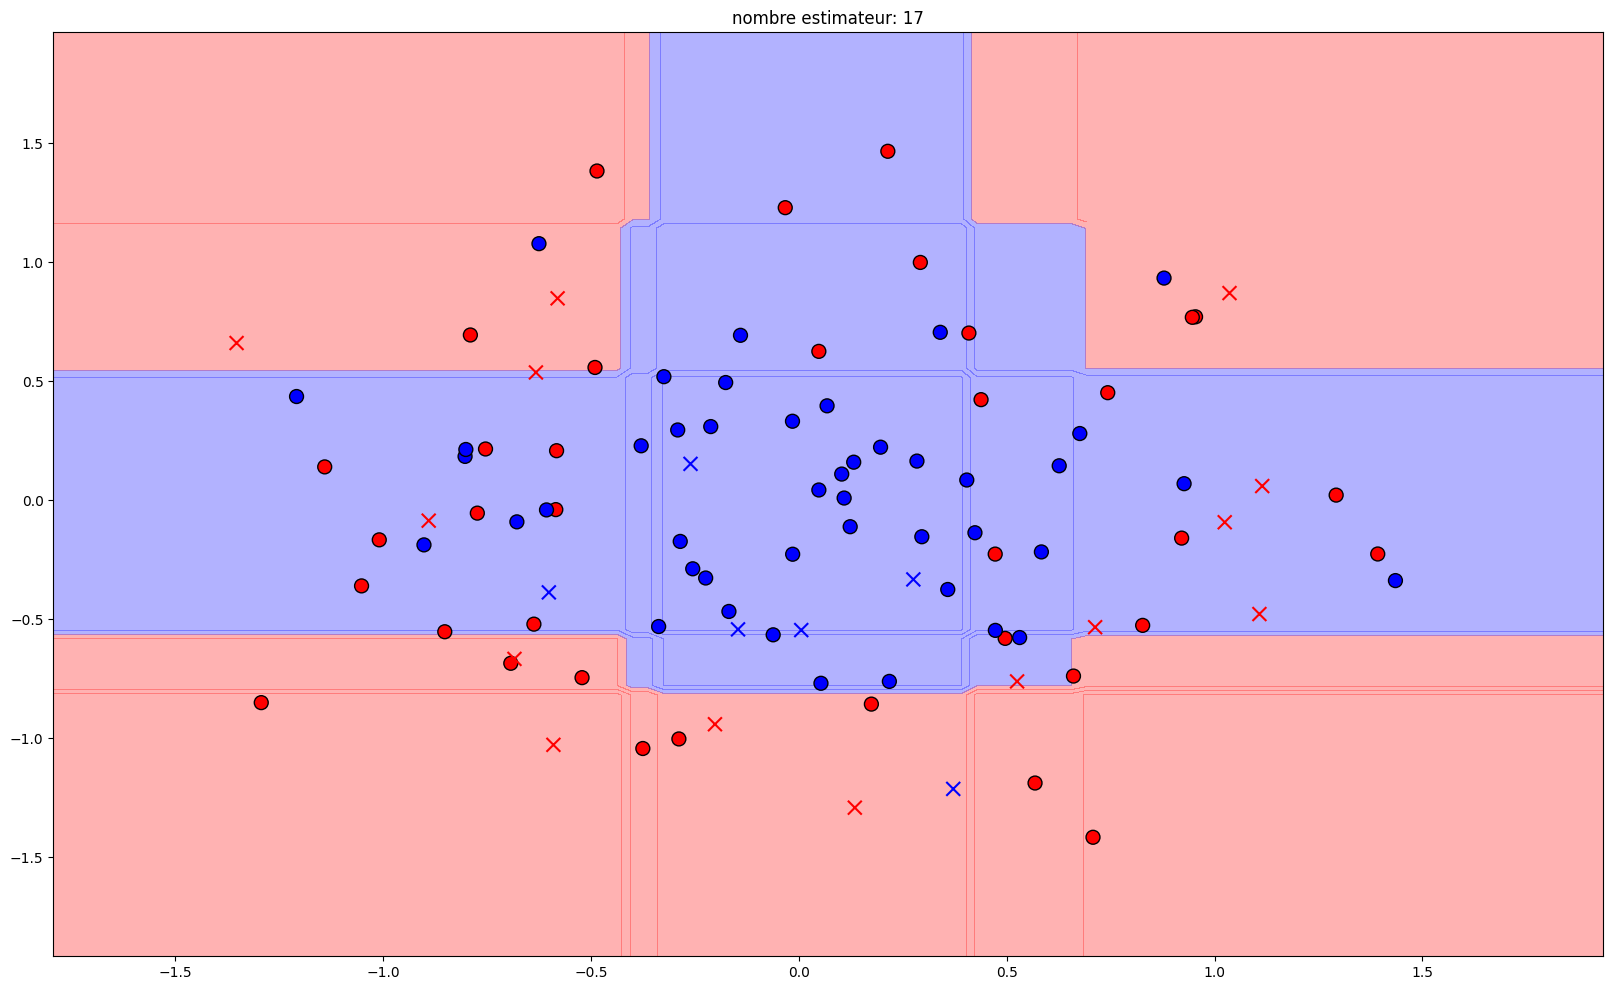

<Figure size 2000x1000 with 0 Axes>

/usr/local/tp_python/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/tmp/ipykernel_30549/468412207.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  disp.ax_.scatter(X_test[:,0],


Nombre d'estimateurs : 19
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.45      0.83      0.59         6

    accuracy                           0.65        20
   macro avg       0.67      0.70      0.64        20
weighted avg       0.76      0.65      0.66        20



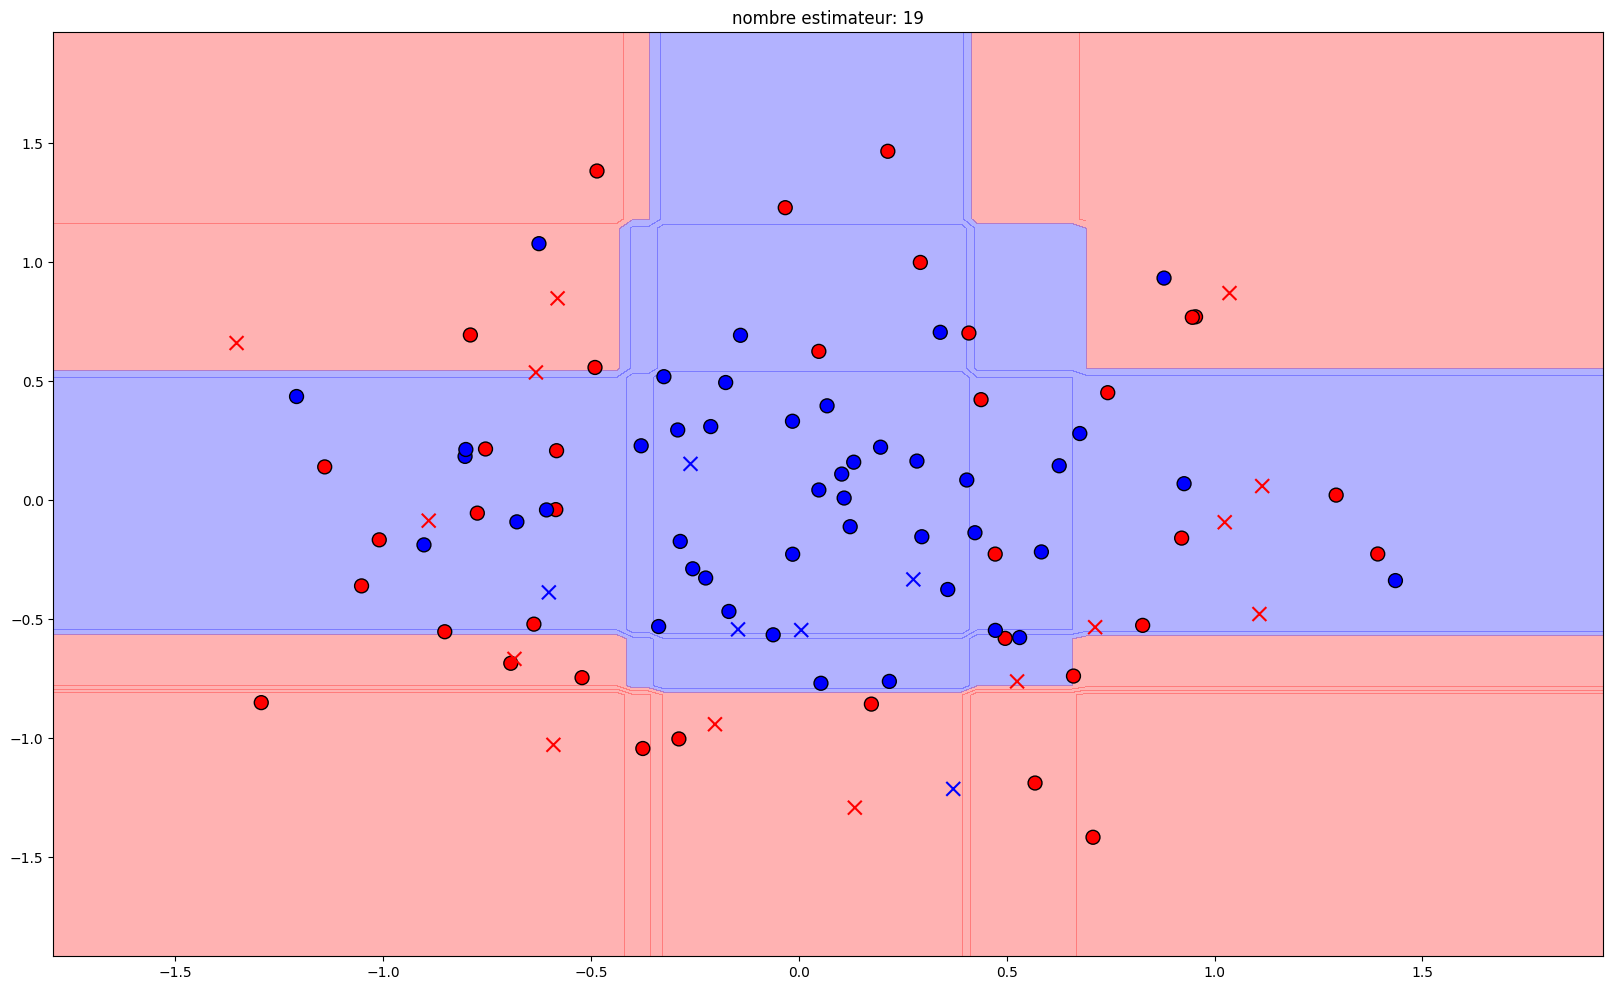

<Figure size 2000x1000 with 0 Axes>

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Créer le classifieur
n_estimators = list(range(1, 21, 2))
for n in n_estimators:
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, algorithm='SAMME')
    clf.fit(X_train_pca, y_train)
    print(f"Nombre d'estimateurs : {n}")
    print(classification_report(y_test, clf.predict(X_test_pca)))
    plot_boundary(clf, X_train_pca, X_test_pca, y_train, y_test, n)
    plt.show()


## 3 - Implémentation d'Adaboost

AdaBoost (Adaptive Boosting) est une technique permettant d'améliorer les performances d'un algorithme de classification donné en prenant une somme pondérée intelligente de plusieurs instances du classificateur.

Cette technique est basée sur la construction itérative d'une série de classifieurs tout en conservant un vecteur de poids indiquant la qualité de la classification de chaque point par les classifieurs précédents. À chaque étape, l'algorithme tente de construire un classifieur qui corrige les erreurs commises par les classifieurs précédents.

En utilisant la notation suivante :

- N - est la taille de l'ensemble de données.
- $\{x_{i},y_{i}\}$ - Sont les features et les étiquettes entre {-1, 1}.

les étapes de cet algorithme sont les suivantes :

- Initialiser un vecteur de poids uniforme pour chaque point de données: $w^{(t=0)}_{i}=\frac{1}{N}$
- Itérer sur les étapes suivantes, avec un indice t, jusqu'à atteindre un certain critère d'arrêt :

    1. Construire un classifieur optimal $h_{t}$ selon les données pondérées données $w^{t-1}_{i}$
    2. Calculer l'erreur de prédiction de $h_{t}$ sur l'ensemble des données pondérées : $\epsilon=\dfrac{\sum_{i}w^{t}_{i}\mathbb{1}_{{h(x_{i}) \neq y_{i}}}}{\sum_{i}w^{t}_{i}}$.
    3. Calculer le poids pour le classifieur $h_{t}$ selon : $\alpha_{t}=\gamma \ln\left(\dfrac{1-\epsilon}{\epsilon}\right)$ avec $\gamma=\frac{1}{2}$ par défaut.
    4. Mettre à jour les poids des données selon $w^{t}_{i}=w^{t-1}_{i}\exp\left(-\alpha_{t} y_{i} h(x_{i})\right)$.
    5. Normaliser le poids par $Z=\sum_{i}w^{t}_{i}$ selon : $w^{t}_{i}=\frac{w^{t}_{i}}{Z}$.



- La prédiction finale sera alors la combinaison linéaire suivante des classifieurs entraînés : $h(x_{i})=\text{sign}\left(\sum_{t}\alpha_{t}h_{t}(x_{i})\right)$.

Écrivez une fonction `init_sample` qui initialise un vecteur de taille $N$ de poids uniforme pour chaque point de données: $w^{(t=0)}_{i}=\frac{1}{N}$

In [15]:
def init_sample(N):
    return np.full(N, 1/N)

In [16]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(init_sample(100), np.ones(100)/100,
                            err_msg="\033[93m {}\033[00m" .format('Test 1 : Les valeurs de init_sample ne sont pas bien initialisées.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Écrivez une fonction `copy_and_fit` qui va prendre en argument un estimator, un ensemble de données `{X,Y}` et les poids `sample_weight` ($w$ dans les formules précédentes) et qui retournera l'estimator apprit avec les `sample_weights`. Vous clonerez l'estimator avant de l'utiliser sur l'ensemble `{X,Y}` en utilisant librairie `copy`. Cette étape correspond à l'étape de construire d'un classifieur optimal $h_{t}$ selon les données pondérées données $w^{t-1}_{i}$.

In [17]:
import copy

def copy_and_fit(estimator, X, Y, sample_weight):
    estimator_copy = copy.deepcopy(estimator)
    estimator_copy.fit(X, Y, sample_weight=sample_weight)
    return estimator_copy


Écrivez une fonction `estimate_error` qui va prendre en argument un estimator, un ensemble de données `{X,Y}` et les `sample_weight`. Cette fonction va renvoyé l'erreur de classification qui correspond à l'étape de calcule de l'erreur de prédiction de $h_{t}$ sur l'ensemble des données pondérées : $\epsilon=\dfrac{\sum_{i}w^{t}_{i}\mathbb{1}_{{h(x_{i}) \neq y_{i}}}}{\sum_{i}w^{t}_{i}}$. 

In [18]:
def estimate_error(estimator, X, y, sample_weight):
    y_pred = estimator.predict(X)
    return np.sum(sample_weight * (y_pred != y)) / np.sum(sample_weight)


Écrivez une fonction `compute_weight_classifier` qui prend en paramétres `classification_error` et $\gamma$. Cette fonction calcule le poids $\alpha_t$ pour le classifieur $h_{t}$ selon : $\alpha_{t}=\gamma \ln\left(\dfrac{1-\epsilon}{\epsilon}\right)$.

In [19]:
import numpy as np

def compute_weight_classifier(classification_error, gamma=0.5):
    alpha_t = gamma * np.log((1 - classification_error) / classification_error)
    return alpha_t


Écrivez une fonction `update_sample_weight` qui prend en paramétres le poids pour le classifieur $h_{t}$ (`estimator_weight`), le poids des exemples (`sample_weight`) et les vecteurs y, y\_predict. Cette fonction retourne la mise à jour les poids des données selon $w^{t}_{i}=w^{t-1}_{i}\exp\left(-\alpha_{t} y_{i} h(x_{i}) \right)$ et normalise les poids par $Z=\sum_{i}w^{t}_{i}$ selon : $w^{t}_{i}=\frac{w^{t}_{i}}{Z}$.

In [20]:
def update_sample_weight(estimator_weight, sample_weight, y, y_predict):
    new_sample_weight = sample_weight * np.exp(- estimator_weight * y * y_predict)
    new_sample_weight /= np.sum(new_sample_weight)
    return new_sample_weight


Écrivez une fonction `predict` qui prendra `X` un ensemble de données, la liste des estimators `estimators_list` et enfin `estimators_weights` la liste des poids de chaque classifieurs. Cette fonction va prédire la prédiction finale qui sera alors la combinaison linéaire suivante des classifieurs entraînés : $h(x_{i})=\text{sign}\left(\sum_{t}\alpha_{t}h_{t}(x_{i})\right)$.

In [21]:
def predict(X, estimators_list, estimator_weights):
    predictions = np.zeros(X.shape[0])
    for i, estimator in enumerate(estimators_list):
        y_pred = estimator.predict(X)
        predictions += estimator_weights[i] * y_pred
    return np.sign(predictions)


Remplissez la classe suivante avec les fonctions précédente.

In [22]:
class AdaBoost:
    def __init__(self, estimator=None, n_estimators=50, learning_rate=0.5):
        """
        estimator: L'estimateur de base à partir duquel l'ensemble boosté est construit.
        n-estimators:(int) Le nombre maximum d'estimateurs pour lequel le boosting est terminé.
        learning_rate: (float, default=1.0) Poids appliqué à chaque classificateur à chaque itération de boosting. 
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        #Begin Solution
        self.estimator = estimator or DecisionTreeClassifier(max_depth=1) #Doit avoir Fit et Predict
        #End Solution
        self.sample_weight_list = []
        self.estimators_list = []
        self.estimator_weights_ = None
        self.estimator_errors_ = None
        self.transform = False
    
    def fit(self, X, y, sample_weight=None):
        # labels de type -1 / 1.
        if np.any(y==0):
            self.transform = True
        y[y==0] = -1
        
        
        
        #Initialisation des poids des samples
        sample_weight = sample_weight or np.ones(X.shape[0])/X.shape[0]
        
        #Reset any provious Fit
        self.sample_weight_list = []
        self.sample_weight_list.append(sample_weight.copy())
        self.estimators_list = []
        self.estimator_weights_ = np.zeros(self.n_estimators, dtype=np.float64)
        self.estimator_errors_ = np.ones(self.n_estimators, dtype=np.float64)
        
        for num_estimator in range(self.n_estimators):
            # Boosting step
            #Cloner et apprendre le current estimator
            
            estimator = copy.deepcopy(self.estimator)
            estimator.fit(X, y, sample_weight=sample_weight)
            
            # Fraction d'erreur
            y_predict = estimator.predict(X)
            estimator_error = np.sum(sample_weight[y_predict != y])/np.sum(sample_weight)
            
            if estimator_error <= 0:
                estimator_weight = 1.0
                estimator_error = 0.0
                self.estimators_list.append(estimator)
                self.estimator_weights_[num_estimator] = estimator_weight
                self.estimator_errors_[num_estimator] = estimator_error
                break

            # Calcule du poids du classifieur
            estimator_weight = self.learning_rate*np.log((1.0 - estimator_error)/estimator_error)
            
            #Mise a jour des samples weight
            sample_weight *= np.exp(-estimator_weight*y*y_predict)
            sample_weight /= np.sum(sample_weight)
            
            #Save Model, sample_weight, estimator_weights and estimator_errors
            self.sample_weight_list.append(sample_weight)
            self.estimators_list.append(estimator)
            self.estimator_weights_[num_estimator] = estimator_weight
            self.estimator_errors_[num_estimator] = estimator_error

        if self.transform:
            y[y==-1] = 0
        return self
    
    def predict(self, X):
        #Prediction
        predicted = np.zeros(X.shape[0])
        for i in range(len(self.estimators_list)):
            predicted += self.estimator_weights_[i] * self.estimators_list[i].predict(X)
            
        predicted = np.sign(predicted)
        
        if self.transform:
            predicted[predicted==-1] = 0 
            
        assert X.shape[0]==predicted.shape[0], "X and predicted y must have the same size"
        return predicted


Testez votre modèle en utilisant `make_circles` de `scikit-learn` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html). Vous allez utiliser 500 samples, un bruit de 0.04 et un facteur de 0.3.

Ensuite testez votre modèle en faisant varier le nombre d'estimateurs (utilisez la fonction plot_boundary)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from adaboost import AdaBoost


# Création de l'ensemble de données make_circles
X, y = make_circles(n_samples=500, noise=0.04, factor=0.3, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciation et entraînement du modèle AdaBoost
ada = AdaBoost(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.5)
ada.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = ada.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Trace de la frontière de décision
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plot_boundary(ada, X, y)
plt.title("Decision boundary of AdaBoost")
plt.show()


ModuleNotFoundError: No module named 'adaboost'